<a class="anchor" id="chapter0"></a>

<a class="anchor" id="previous0"></a>

[Back to table of contents](#back1)

# Identifying patterns of successful video games

By Yevgenii Atlasman  
December 2021

# Project description
We work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.  

We have data for 2016 year. Now it’s December 2016 and we’re planning a campaign for 2017.

# Data description
- Name  
- Platform
- Year_of_Release
- Genre
- NA_sales (North American sales in USD million)
- EU_sales (sales in Europe in USD million)
- JP_sales (sales in Japan in USD million)
- Other_sales (sales in other countries in USD million)
- Critic_Score (maximum of 100)
- User_Score (maximum of 10)
- Rating (ESRB)  

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

<a class="anchor" id="back1"></a>

# Table of Contents

 [Project Descriprion](#chapter0) 
* [Open the data files and study the general information](#chapter1)  
* [Data preprocessing](#chapter2)
    * [Processing missing values](#section_2_2)
        * [name and genre](#section_2_2_1)
        * [year_of_release](#section_2_2_2)
        * [critic_score](#section_2_2_3)
        * [user_score](#section_2_2_4)
        * [rating](#section_2_2_6)
        * [Conclusion](#section_2_2_5)
    * [Data type replacement](#section_2_1)  
        * [Conclusion](#section_2_1_1)
    * [Replacing abbreviation of rating with it's description](#section_2_3)
        * [Conclusion](#section_2_3_1)
    * [Calculate the total sales](#section_2_4)
        * [Conclusion](#section_2_4_1)
* [Analyze the data](#chapter3)  
    * [Distribution of the number of games by years](#section_3_1)
        * [Conclusion](#section_3_1_1)
    * [Total sales for different platforms](#section_3_2)
        * [Total sales per platform](#section_3_2_1)
        * [Sales distribution by year for platforms with the greatest total sales](#section_3_2_2)
        * [Analyze platforms lifetime](#section_3_2_3)
        * [Conclusion](#section_3_2_4)
    * [Determine the period for analysis](#section_3_3)
        * [Conclusion](#section_3_3_1)
    * [Platforms leaders and outsiders](#section_3_4)
        * [Conclusion 1](#section_3_4_1)
        * [Distribution of number of games by platform](#section_3_4_2)
        * [Conclusion 2](#section_3_4_3)
    * [Boxplot for games total sales by platforms](#section_3_5)
        * [Conclusion](#section_3_5_1)
    * [Correlation between reviews and total sales](#section_3_6)
        * [Conclusion](#section_3_6_1)
    * [General distribution of games by genre](#section_3_7)
        * [Conclusion](#section_3_7_1)
    * [Create a user profile for each region](#section_3_8)
        * [Top five platforms](#section_3_8_1)
        * [Conclusion](#section_3_8_2)
        * [Top five genres](#section_3_8_3)
        * [Conclusion](#section_3_8_4)
        * [ESRB ratings](#section_3_8_5)
        * [Conclusion](#section_3_8_6)
* [Test the hypotheses](#chapter4)  
    * [Average user ratings of the Xbox One and PC platforms are the same](#section_4_1)
        * [Conclusion](#section_4_1_1)
    * [Average user ratings for the Action and Sports genres are different](#section_4_2)
        * [Conclusion](#section_4_2_1)
* [General conclusion](#chapter5)  
* [Recommendations for add campains](#chapter6)  


<a class="anchor" id="chapter1"></a>

<a class="anchor" id="previous1"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous0)

[Go to next section](#previous2)

## Open the data files and study the general information

**Import all neсessary libraries.** Install sidetable. Use !pip install.

In [1]:
!python -m pip install sidetable

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from scipy import stats as st
from math import factorial
import math
from functools import reduce
import sidetable
import heapq

**Use try-except method to read csv file, because it should work both on local computer and jupiter hub.**   
Assign the name `df_games` to the datasets and open it.

In [4]:
try:
    df_games = pd.read_csv('games.csv')
except:
    df_games = pd.read_csv('C:/Users/user/Desktop/python/datasets/games.csv')

Look at the first 5 rows of data. Use the `head()` method.

In [5]:
df_games.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

We see some missing values in `critic_score`, `user_score` and `rating`.

Take a closer look at general information using the `info()` method. We can check how much columns it has, what data type of each column, how many non-null rows in each column.

In [6]:
df_games.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 5.6 MB


- The length of dataframe is 16715 rows.

- There are 16713 non-null values in `Name` column, so there are two games without name.

- There are also missing values in `Year_of_Release`, `Genre`, `Critic_score`, `User_Score` and `Rating` columns. We should analyze and process them later.

- We should also change column's names to lower string later for more convenient way typing them in the code. 

Take a closer look at numeric and categorical columns using the `describe()` method.

In [7]:
df_games.describe().T

count         mean        std     min     25%      50%  \
Year_of_Release  16446.0  2006.484616   5.877050  1980.0  2003.0  2007.00   
NA_sales         16715.0     0.263377   0.813604     0.0     0.0     0.08   
EU_sales         16715.0     0.145060   0.503339     0.0     0.0     0.02   
JP_sales         16715.0     0.077617   0.308853     0.0     0.0     0.00   
Other_sales      16715.0     0.047342   0.186731     0.0     0.0     0.01   
Critic_Score      8137.0    68.967679  13.938165    13.0    60.0    71.00   

                     75%      max  
Year_of_Release  2010.00  2016.00  
NA_sales            0.24    41.36  
EU_sales            0.11    28.96  
JP_sales            0.04    10.22  
Other_sales         0.03    10.57  
Critic_Score       79.00    98.00

- We have games released from 1980 to 2016, but more new games because medium year is 2007.

- We have minimum sales in every region - 0. We should check it later. It's a lot of '0' values. Probably it happend because a lot of platforms already don't exist and games for them don't release.

- Minimum critic score is 13 and maximum is 98 (from 100). Medium score is 71.

In [8]:
df_games.describe(include=['object']).T

count unique                          top  freq
Name        16713  11559  Need for Speed: Most Wanted    12
Platform    16715     31                          PS2  2161
Genre       16713     12                       Action  3369
User_Score  10014     96                          tbd  2424
Rating       9949      8                            E  3990

- There 11559 unique game's names from 16715 rows. We should check it for duplicates.

- From all over 16000 games the most games were on `PS2` - 2161.

- The most frequent genre of games is `action` - 3369.

- The most frequent user score is `tbd` (to be determined) - 2424 games got it. Probably somebody who entered the data left this mark to determine these values later. In real case we should ask responsible for that and return it to fill in the table from the appropriate source. We'll convert this column from string to numeric later and replace `tbd` with null.

- The most frequent rating from ESRB is `E` - 3990 games got it.

Look at unique values in different columns to know what we are dealing with.

In [9]:
df_games.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [10]:
df_games.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In `Genre` we have 2 missing values.

In [11]:
df_games.Rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In `Rating` we have a lot of missing values. We can't do something with it because of the column's data type - `object`. We'll leave it as it is.

Describe the rating abbreviation to get more information from it. Later we will replace abbreviation with it's description. 
- 'EC' ('Early childhood'). Replace with '3+'.
- 'E' ('Everyone'). Replace with 'Everyone'.
- 'K-A' ('Kids to Adults') - the previous version of 'E'. So Replace with 'Everyone'.
- 'E10+' ('Everyone 10 and older'). Replace with '10+'.
- 'T' ('Teen'). Replace with '13+'.
- 'M' ('Mature'). Replace with '17+'.
- 'AO' ('Adults Only 18+'). Replace with '18+'.
- 'RP' ('Rating Pending'). It should probably be new games from 2016. Leave it as it is.

Check the dataframe for duplicate rows.

In [12]:
df_games.duplicated().sum()

0

There is no duplicates.

Check why we have only 11559 unique game's names from 16715. And why `Need for Speed: Most Wanted` appears 12 times.

In [13]:
df_games[df_games['Name'] == "Need for Speed: Most Wanted"].head()

Name Platform  Year_of_Release   Genre  NA_sales  \
253   Need for Speed: Most Wanted      PS2           2005.0  Racing      2.03   
523   Need for Speed: Most Wanted      PS3           2012.0  Racing      0.71   
1190  Need for Speed: Most Wanted     X360           2012.0  Racing      0.62   
1591  Need for Speed: Most Wanted     X360           2005.0  Racing      1.00   
1998  Need for Speed: Most Wanted       XB           2005.0  Racing      0.53   

      EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
253       1.79      0.08         0.47          82.0        9.1      T  
523       1.46      0.06         0.58           NaN        NaN    NaN  
1190      0.78      0.01         0.15          83.0        8.5      T  
1591      0.13      0.02         0.10          83.0        8.5      T  
1998      0.46      0.00         0.05          83.0        8.8      T

Now we see that this game was released in 2005 and 2012 and it was on differen platforms. So it's not duplicates.

### Conclusion

A first glance at the data frames was taken. Our analysis of the data frame revealed some unclear information. So it needs some preparation and preprocessing before it can be analyzed.

<a class="anchor" id="chapter2"></a>

<a class="anchor" id="previous2"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous1)

[Go to next section](#previous3)

## Data preprocessing

Let's replace the column names (make them lowercase). Create variable `columns_name` and assign to our dataframe the columns attribute `df.columns` for outputting column names. Use the method `str.lower()` to make them lowercase.

In [14]:
columns_name = df_games.columns.str.lower()
columns_name

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Set new column's names by calling the `set_axis()` method with arguments - list of new column's names, axis with the `'columns'` value for changes in columns, `'inplace'` with the value `True` for changes to the data structure.

In [15]:
df_games.set_axis(columns_name, axis = 'columns', inplace = True)
df_games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

<a class="anchor" id="section_2_2"></a>

<a class="anchor" id="previous3"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous2)

[Go to next section](#previous4)

### Processing missing values

We should check percentage of missing values in every column. For that use `sidetable` library and `stb.missing()`. Set `style=True` to get percentages rounded to second decimal.

In [16]:
df_games.stb.missing(style=True)

In [17]:
df_games[df_games['user_score'].isnull()].head()

name platform  year_of_release         genre  \
1          Super Mario Bros.      NES           1985.0      Platform   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
9                  Duck Hunt      NES           1984.0       Shooter   
10                Nintendogs       DS           2005.0    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
1      29.08      3.58      6.81         0.77           NaN        NaN    NaN  
4      11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5      23.20      2.26      4.22         0.58           NaN        NaN    NaN  
9      26.93      0.63      0.28         0.47           NaN        NaN    NaN  
10      9.05     10.95      1.93         2.74           NaN        NaN    NaN

It's 51.32% missing values in `critic_score`, 40.09% in `user_score` and 40.48% in `rating` columns. We should analyze carefully before dealing with them. Check what the reason might be that we have missing values. Maybe data is missing from previous years (before 2000).

<a class="anchor" id="section_2_2_1"></a>

<a class="anchor" id="previous4"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous3)

[Go to next section](#previous5)

#### `name` and `genre`

First, let's deal with `name` and `genre` columns.

In [18]:
df_games[df_games['name'].isnull()]

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

We see that missing values from columns `name` and `genre` in the same rows. Check how many games were released on the platform `GEN`. Use the `query()` method.

In [19]:
df_games.query('platform =="GEN"').count()

name               27
platform           29
year_of_release    29
genre              27
na_sales           29
eu_sales           29
jp_sales           29
other_sales        29
critic_score        0
user_score          0
rating              0
dtype: int64

It's only 29 games, check what genres of these games and what year of release.

In [20]:
df_games.query('platform =="GEN"').groupby(['genre', 'year_of_release'])['platform'].count()

genre         year_of_release
Action        1990.0             1
              1993.0             2
Adventure     1992.0             1
              1993.0             1
Fighting      1992.0             2
              1993.0             1
              1994.0             2
Misc          1994.0             1
Platform      1991.0             1
              1992.0             1
              1993.0             1
              1994.0             4
Racing        1994.0             1
Role-Playing  1993.0             1
              1994.0             2
Shooter       1992.0             1
Sports        1992.0             1
              1994.0             2
Strategy      1993.0             1
Name: platform, dtype: int64

Games released from 1990 to 1994 for `GEN` platform and in different genres. We think that this information less relevant for us and it's only 2 missing values we can drop them. It won't affect on our analysis.

Take only rows where the `isnull()` method for `genre` column takes on a value `0`.

In [21]:
df_games = df_games[df_games['genre'].isnull() == 0]
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


<a class="anchor" id="section_2_2_2"></a>

<a class="anchor" id="previous5"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous4)

[Go to next section](#previous6)

#### `year_of_release`

Check what platforms have the most missing values in `year_of_release`. For that find all missing values for this column by using the `isnull()` method. Use the `groupby()` method to group by `platform` and the `count()` method to count missing values for each platform. Sort the result in descending order and take first 5 rows.

In [22]:
df_games[df_games['year_of_release'].isnull()].groupby(
    'platform')['name'].count().sort_values(ascending=False).head()

platform
PS2     34
Wii     34
DS      30
X360    30
PS3     25
Name: name, dtype: int64

It's 34 games that don't have year of release on `PS2` and `Wii`.

Look in which years were released games on `PS2`. Group by `year_of_release` and count.

In [23]:
df_games.query('platform == "PS2"')[['year_of_release', 'name']].groupby(
    'year_of_release').count().reset_index()

year_of_release  name
0            2000.0    82
1            2001.0   185
2            2002.0   280
3            2003.0   256
4            2004.0   259
5            2005.0   260
6            2006.0   259
7            2007.0   214
8            2008.0   191
9            2009.0    96
10           2010.0    38
11           2011.0     7

It's from 2000 to 2011 for `PS2`.

In [24]:
df_games.query('platform == "Wii"')[['year_of_release', 'name']].groupby(
    'year_of_release').count().reset_index()

year_of_release  name
0            2006.0    44
1            2007.0   185
2            2008.0   282
3            2009.0   325
4            2010.0   253
5            2011.0   143
6            2012.0    31
7            2013.0    12
8            2014.0     6
9            2015.0     4
10           2016.0     1

And from 2006 to 2016 for `Wii`.

The most games on `PS2` were released between 2002 and 2008, on `Wii` - between 2007 and 2011. So data is missing for newest platfrom as much as for old. Probably the data was missing by mistake while typing or some technical error.

Group by `platform` and calculate the mean `year_of_release` for each platform. Round values to the full year. Use `lambda` function.

In [25]:
mean_year_for_platform = (
    pd.DataFrame(
        df_games
        .groupby('platform')['year_of_release']
        .mean()
        .apply(lambda x: round(x)))
    .reset_index()
)
mean_year_for_platform.head()

platform  year_of_release
0     2600             1982
1      3DO             1995
2      3DS             2013
3       DC             2000
4       DS             2008

In [26]:
mean_year_for_platform.query('platform =="PS2"')

platform  year_of_release
16      PS2             2005

We calculated the mean `year_of_release` for each platform. For games on `PS2` it's 2005.

Check some missing values in `year_of_release`.

In [27]:
df_games[df_games['year_of_release'].isnull()].head()

name platform  year_of_release     genre  na_sales  \
183             Madden NFL 2004      PS2              NaN    Sports      4.26   
377            FIFA Soccer 2004      PS2              NaN    Sports      0.59   
456  LEGO Batman: The Videogame      Wii              NaN    Action      1.80   
475  wwe Smackdown vs. Raw 2006      PS2              NaN  Fighting      1.57   
609              Space Invaders     2600              NaN   Shooter      2.36   

     eu_sales  jp_sales  other_sales  critic_score user_score rating  
183      0.26      0.01         0.71          94.0        8.5      E  
377      2.36      0.04         0.51          84.0        6.4      E  
456      0.97      0.00         0.29          74.0        7.9   E10+  
475      1.02      0.00         0.41           NaN        NaN    NaN  
609      0.14      0.00         0.03           NaN        NaN    NaN

We see that `Madden NFL 2004` and `FIFA Soccer 2004` released on `PS2` and it will be filled in with `2005`. It can be not correct. We could fill in with year extracted from name. But not every game has year in it's name. We could check third-party sources to look for `year_of_release`, but it's only 269 missing values that less than 2% of data. So we decided that it would be easier get rid from these missing values. 

Take only rows where the `isnull()` method for `year_of_release` column takes on a value `0`.

In [28]:
df_games = df_games[df_games['year_of_release'].isnull() == 0]
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


<a class="anchor" id="section_2_2_3"></a>

<a class="anchor" id="previous6"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous5)

[Go to next section](#previous7)

#### `critic_score`

Check what years have the most missing values in `critic_score`. For that find all missing values for this column by using the `isnull()` method. Use the `groupby()` method to group by `year_of_release` and the `count()` method to count missing values for each year. Sort the result in descending order and take first 5 rows.

In [29]:
df_games[df_games['critic_score'].isnull()].groupby(
    'year_of_release')['name'].count().sort_values(ascending=False).head()

year_of_release
2009.0    775
2010.0    755
2008.0    712
2011.0    636
2007.0    505
Name: name, dtype: int64

Check what platforms have the most missing values in `critic_score`.

In [30]:
df_games[df_games['critic_score'].isnull()].groupby(
    'platform')['name'].count().sort_values(ascending=False).head()

platform
DS     1413
PS      994
PS2     852
PSP     737
Wii     718
Name: name, dtype: int64

The most missing values in `critic_score` column in games released in 2009 year. Check how many games were released in 2009 at all.

In [31]:
df_games[df_games['year_of_release'] == 2009]['name'].count()

1426

So it were 775 missing `critic_score`'s from 1426 in 2009. Our suggestion about missing values in old games because there wasn't such scoring in 1990 was wrong. It can be true but not only that reason affects on that fact that we have missing values here. Probably the data wasn't collected properly or was missed somewhere in the middle of the process of collection. In real case we should talk with technical department or check the source the data was collected from. Probably it means that these games didn't get critic scoring at all. If so we consider it wrong to fill in this data with mean or median, as it will distort the data. And we can't drop them because we'll lose big amount of data. We also can't leave it as it is because we won't be able to work with missing values.

Replace the missing values with `np.nan` values.

In [32]:
df_games.loc[df_games['critic_score'].isnull(), 'critic_score'] = np.nan
df_games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

<a class="anchor" id="section_2_2_4"></a>

<a class="anchor" id="previous7"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous6)

[Go to next section](#previous8)

#### `user_score`

The same with `user_score`.

Check how many `tbd` values we've got.

In [33]:
len(df_games[df_games['user_score'] == 'tbd'])

2376

In [34]:
df_games[df_games['user_score'] == 'tbd'].head()

name platform  year_of_release   genre  \
119                   Zumba Fitness      Wii           2010.0  Sports   
301  Namco Museum: 50th Anniversary      PS2           2005.0    Misc   
520                 Zumba Fitness 2      Wii           2011.0  Sports   
645                    uDraw Studio      Wii           2010.0    Misc   
718                 Just Dance Kids      Wii           2010.0    Misc   

     na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
119      3.45      2.59       0.0         0.66           NaN        tbd      E  
301      2.08      1.35       0.0         0.54          61.0        tbd   E10+  
520      1.51      1.03       0.0         0.27           NaN        tbd      T  
645      1.65      0.57       0.0         0.20          71.0        tbd      E  
718      1.52      0.54       0.0         0.18           NaN        tbd      E

Replace `tbd` value with `np.nan`.

In [35]:
df_games.loc[df_games['user_score'] == 'tbd', 'user_score'] = np.nan

Let's check whether the code was performed correctly by taking a look at one of the games from above.

In [36]:
df_games[df_games['name'] == 'The Incredibles']

name platform  year_of_release   genre  na_sales  eu_sales  \
666   The Incredibles      PS2           2004.0  Action      0.96      1.08   
821   The Incredibles      GBA           2004.0  Action      1.15      0.77   
2456  The Incredibles       GC           2004.0  Action      0.65      0.17   

      jp_sales  other_sales  critic_score user_score rating  
666       0.04         0.30          62.0        7.6      T  
821       0.04         0.10          55.0        NaN      E  
2456      0.00         0.02          63.0        7.1      T

In [37]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


<a class="anchor" id="section_2_2_6"></a>

<a class="anchor" id="previous8"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous7)

[Go to next section](#previous9)

#### `rating`

We'll fill in missing values in `rating` with `Unknown`.

In [38]:
df_games['rating'] = df_games['rating'].fillna('unknown')

In [39]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [40]:
df_games['rating'].value_counts()

unknown    6676
E          3921
T          2905
M          1536
E10+       1393
EC            8
K-A           3
AO            1
RP            1
Name: rating, dtype: int64

<a class="anchor" id="section_2_2_5"></a>

#### Conclusion

We filled in `rating` with `Unknown`, missing values in `critic_score` and `tbd` in `user_score` replaced with `np.nan`. Also dropped missing values in `year_of_release`, `name` and `genre` because it was small part of data (1.6%).

<a class="anchor" id="section_2_1"></a>

<a class="anchor" id="previous9"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous8)

[Go to next section](#previous10)

### Data type replacement

For columns with low cardinality (the amount of unique values is lower than 50% of the count of these values) we can optymize datatype.
First, check what categorical columns have the amount of unique values is lower than 50% of the count of these values. It's `genre` and `rating`.

In [41]:
df_games['genre'] = df_games['genre'].astype('category')

Let's change data type of column `year_of_release` from float to integer. Because of the missing values in this column pandas can't be sure that the missing values isn't a decimal numbers, it automatically converts the column's data type to `float64`. So, apply the `astype()` method to this column with argument `'int'`.

In [42]:
df_games = df_games.astype({'year_of_release': 'int'})

Convert `user_score` column from string to numeric. Use the `pd.to_numeric()` method. Set `errors='coerce'` to convert `tbd` from string to `NaN` (null value).

In [43]:
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

Check the result.

In [44]:
df_games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  
0     28.96      3.77         8.45          76.0         8.0        E  
1      3.58      6.81         0.77           NaN         NaN  unknown  
2     12.76      3.79         3.29          82.0         8.3        E  
3     10.93      3.28         2.95          80.0         8.0        E  
4      8.89     10.22         1.00           NaN         NaN  unknown

In [45]:
df_games.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16444 non-null  object  
 1   platform         16444 non-null  object  
 2   year_of_release  16444 non-null  int32   
 3   genre            16444 non-null  category
 4   na_sales         16444 non-null  float64 
 5   eu_sales         16444 non-null  float64 
 6   jp_sales         16444 non-null  float64 
 7   other_sales      16444 non-null  float64 
 8   critic_score     7983 non-null   float64 
 9   user_score       7463 non-null   float64 
 10  rating           16444 non-null  object  
dtypes: category(1), float64(6), int32(1), object(3)
memory usage: 4.1 MB


We'll leave the column `user_score` as it is for a while, because we have to deal with string values (`tbd`) into this column. `tbd` means that the score wasn't determined unless 4 reviews have been submitted.

<a class="anchor" id="section_2_1_1"></a>

#### Conclusion

For a more convenient view of years, we've changed the column's `year_of_release` data types. To reduce memory usage, we have changed the data type of other columns.

<a class="anchor" id="section_2_3"></a>

<a class="anchor" id="previous10"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous9)

[Go to next section](#previous11)

### Replacing abbreviation of rating with it's description

Replace abbreviation with it's description. 
- 'EC' ('Early childhood'). Replace with '3+'.
- 'E' ('Everyone'). Replace with 'Everyone'.
- 'K-A' ('Kids to Adults') - the previous version of 'E'. So Replace with 'Everyone'.
- 'E10+' ('Everyone 10 and older'). Replace with '10+'.
- 'T' ('Teen'). Replace with '13+'.
- 'M' ('Mature'). Replace with '17+'.
- 'AO' ('Adults Only 18+'). Replace with '18+'.
- 'RP' ('Rating Pending'). It should probably be new games from 2016. Replace these cells with 'unknown'.

In [46]:
len(df_games.query('rating == "RP"'))

1

It's only 3 games with `RP` value.

Use `np.where()` to replace values in `df_games.rating` column.

In [47]:
df_games['rating'] = np.where(df_games.rating == 'EC', '3+', df_games.rating)
df_games['rating'] = np.where(df_games.rating == 'E', 'everyone', df_games.rating)
df_games['rating'] = np.where(df_games.rating == 'K-A', 'everyone', df_games.rating)
df_games['rating'] = np.where(df_games.rating == 'E10+', '10+', df_games.rating)
df_games['rating'] = np.where(df_games.rating == 'T', '13+', df_games.rating)
df_games['rating'] = np.where(df_games.rating == 'M', '17+', df_games.rating)
df_games['rating'] = np.where(df_games.rating == 'AO', '18+', df_games.rating)
df_games['rating'] = np.where(df_games.rating == 'RP', 'unknown', df_games.rating)
df_games['rating'] = np.where(df_games.rating.isnull(), 'unknown', df_games.rating)

Check the result using the `unique()` method.

In [48]:
df_games['rating'].unique()

array(['everyone', 'unknown', '17+', '13+', '10+', '18+', '3+'],
      dtype=object)

<a class="anchor" id="section_2_3_1"></a>

#### Conclusion

Everything worked properly. Ratings have been replaced to make their meanings more clear.

<a class="anchor" id="section_2_4"></a>

<a class="anchor" id="previous11"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous10)

[Go to next section](#previous12)

### Calculate the total sales  
- Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [49]:
df_games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score    rating  
0     28.96      3.77         8.45          76.0         8.0  everyone  
1      3.58      6.81         0.77           NaN         NaN   unknown  
2     12.76      3.79         3.29          82.0         8.3  everyone  
3     10.93      3.28         2.95          80.0         8.0  everyone  
4      8.89     10.22         1.00           NaN         NaN   unknown

Set variables the new column `total_sales` and put there result of summing up of each row of columns `na_sales`, `eu_sales`, `jp_sales`, `other_sales`. Use the `sum()` method

In [50]:
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

Check the first 5 rows.

In [51]:
df_games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score    rating  \
0     28.96      3.77         8.45          76.0         8.0  everyone   
1      3.58      6.81         0.77           NaN         NaN   unknown   
2     12.76      3.79         3.29          82.0         8.3  everyone   
3     10.93      3.28         2.95          80.0         8.0  everyone   
4      8.89     10.22         1.00           NaN         NaN   unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

Look at 5 games with largest total sales. Use the `nlargest()` method.

In [52]:
df_games.nlargest(5, ['total_sales'])

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score    rating  \
0     28.96      3.77         8.45          76.0         8.0  everyone   
1      3.58      6.81         0.77           NaN         NaN   unknown   
2     12.76      3.79         3.29          82.0         8.3  everyone   
3     10.93      3.28         2.95          80.0         8.0  everyone   
4      8.89     10.22         1.00           NaN         NaN   unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

It's almost the same games which got the most sales in North America (`na_sales`). Only `Wii Sports Resort` and `Pokemon Red/Pokemon Blue` weren't first in `NA` but they've got big sales in Europe and Japan.

<a class="anchor" id="section_2_4_1"></a>

#### Conclusion

We've calculated total sales for every game. In the first 5 games by sales - 3 were released on the `Wii` platform in the first years of it's existence.

<a class="anchor" id="chapter3"></a>

<a class="anchor" id="previous12"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous11)

[Go to next section](#previous100)

## Analyze the data

Use the `freq()` method from the `sidetable` library to count number of games released on each platform and calculate it's share from the total number of games.

In [53]:
df_games.stb.freq(['platform'], style=True, cum_cols=False)

The most popular platforms are PS2 with 12.93% of all games released, DS (12.90%), PS3 (7.94%), Wii (7.82%) and X360 (7.49%).

Look at 5 games with largest sales in NA. Use the `nlargest()` method.

In [54]:
df_games.nlargest(5, ['na_sales'])

name platform  year_of_release     genre  na_sales  eu_sales  \
0         Wii Sports      Wii             2006    Sports     41.36     28.96   
1  Super Mario Bros.      NES             1985  Platform     29.08      3.58   
9          Duck Hunt      NES             1984   Shooter     26.93      0.63   
5             Tetris       GB             1989    Puzzle     23.20      2.26   
2     Mario Kart Wii      Wii             2008    Racing     15.68     12.76   

   jp_sales  other_sales  critic_score  user_score    rating  total_sales  
0      3.77         8.45          76.0         8.0  everyone        82.54  
1      6.81         0.77           NaN         NaN   unknown        40.24  
9      0.28         0.47           NaN         NaN   unknown        28.31  
5      4.22         0.58           NaN         NaN   unknown        30.26  
2      3.79         3.29          82.0         8.3  everyone        35.52

It's Wii Sports with 41.36 millions dollar on `Wii` platform, two games on `NES` platform with 29.08 and 26.93 millions sales. One on `GB` (23.2 millions) and one more on `Wii` (15.68 millions).

<a class="anchor" id="section_3_1"></a>

<a class="anchor" id="previous100"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous12)

[Go to next section](#previous13)

### Distribution of the number of games by years

- **Look at how many games were released in different years. Check if the data for every period significant.**

Sort values by `year_of_release` to see how number of games changed YoY.

In [55]:
distr_by_year = (
    df_games[['year_of_release', 'name']]
    .groupby('year_of_release')
    .count()
    .sort_values(by='year_of_release')
    .reset_index()
)
distr_by_year.columns = ['year_of_release', 'n_games']
distr_by_year

year_of_release  n_games
0              1980        9
1              1981       46
2              1982       36
3              1983       17
4              1984       14
5              1985       14
6              1986       21
7              1987       16
8              1988       15
9              1989       17
10             1990       16
11             1991       41
12             1992       43
13             1993       60
14             1994      121
15             1995      219
16             1996      263
17             1997      289
18             1998      379
19             1999      338
20             2000      350
21             2001      482
22             2002      829
23             2003      775
24             2004      762
25             2005      939
26             2006     1006
27             2007     1197
28             2008     1427
29             2009     1426
30             2010     1255
31             2011     1136
32             2012      653
33             2013      544
34             2014      581
35             2015      606
36             2016      502

Look at general information of `distr_by_year`. Use the `info()` method.

In [56]:
distr_by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   year_of_release  37 non-null     int64
 1   n_games          37 non-null     int64
dtypes: int64(2)
memory usage: 720.0 bytes


Plot the lollipop graph to build distribution of the number of games YoY. For that build vertical lines (`vlines`) where on the axis x will be `distr_by_year['year_of_release']` and set `ymin=0`  and `ymax = distr_by_year['n_games']`. Build dots plotting `scatter` with coordinates `x = distr_by_year['year_of_release']` and `y = distr_by_year['n_games']` (the value that in the column `name` accord to each year. Set title, ylabel and annotation to dots (use `ax.text()` with coordinates `row[1]` - year and `row[2]+30` - the values from the column `n_games` shifted up by 30.

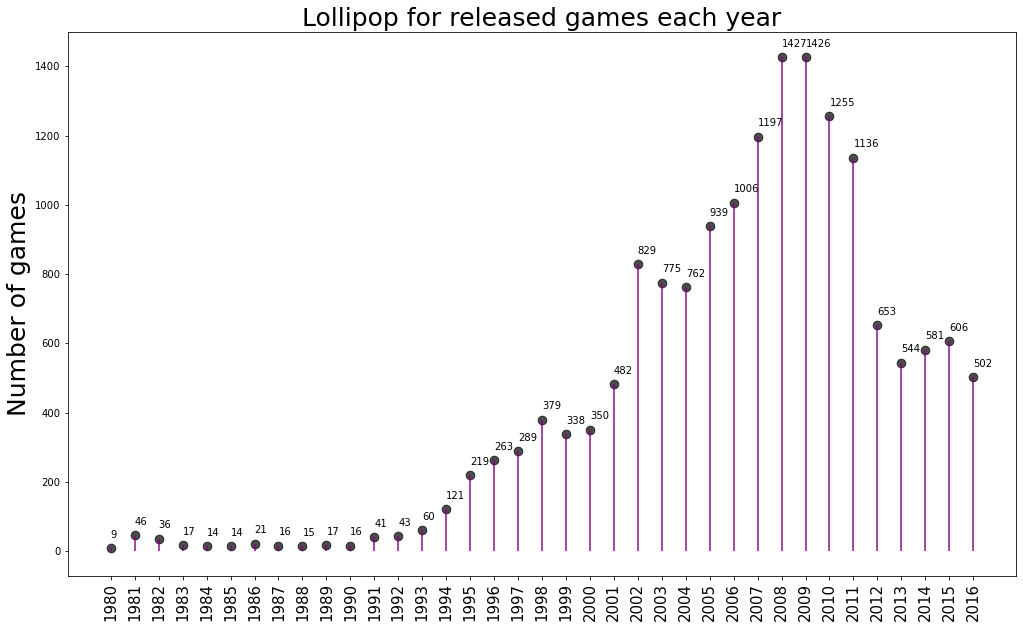

In [57]:
fig, ax = plt.subplots(figsize=(17,10))

ax.vlines(x = distr_by_year['year_of_release'], ymin = 0, 
          ymax = distr_by_year['n_games'], color='purple', alpha = 0.7, linewidth = 2)

ax.scatter(x = distr_by_year['year_of_release'], y = distr_by_year['n_games'],
           s=75, color='black', alpha=0.7)

ax.set_title("Lollipop for released games each year", fontdict={'size':25})
ax.set_ylabel("Number of games", fontdict={'size':25})
ax.set_xticks(distr_by_year['year_of_release'])
ax.set_xticklabels(distr_by_year['year_of_release'], rotation=90, fontdict={'size':15})

for row in distr_by_year.itertuples():
    ax.text(row[1], row[2]+30, s = round(row[2], 2))

<a class="anchor" id="section_3_1_1"></a>

#### Conclusion

Significant growth in the number of games released each year began in 1994 (from 60 in previous years to 121 in 1994), accelerated after 2002 (829 new games), and peaked in 2008-2009 (1427 - 1426 new games released each year). The number of new games decreased to 502 last year. This might be due to the fact that people still play their favorite game series from previous years, and companies only remaster these games or release new ones. Many games fade into history as well. Formerly, there were many games studios, but now there are probably just a few big ones.

<a class="anchor" id="section_3_2"></a>

<a class="anchor" id="previous13"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous12)

[Go to next section](#previous14)

### Total sales for different platforms

<a class="anchor" id="section_3_2_1"></a>

- **Look at how sales varied from platform to platform.**

For that let's take only two rows - `platform` and `total_sales` and group by `platform` and sum `total_sales`. Sort by `total_sales` in ascending order and reset index. Set the result to a variable `sales_by_platform`.

In [58]:
sales_by_platform = (
    df_games[['platform', 'total_sales']]
    .groupby('platform')
    .sum()
    .sort_values(by='total_sales', ascending = False)
    .reset_index()
)
sales_by_platform.head()

platform  total_sales
0      PS2      1233.56
1     X360       961.24
2      PS3       931.34
3      Wii       891.18
4       DS       802.78

- We see that `PS2` has the highest total sales for all it's existence (1,233 billions dollars). Next goes `X360` with 961.24 millions, `PS3` (931.34 millions), Wii (891.18 millions) and `DS` (802.78 millions).
- While `PS2` was at first place by number of games released on it (2127 games - 12.93%), `DS` - second place (12.90%), `PS3` - third place (7.94%), `Wii` (7.82%) and `X360` (7.49%). So the top 5 platforms are the same here, but `DS` with higher share by number of games on the market (by 5.41 more%) had less total sales than `X360` (by 158.46 millions) despite the fact that the platforms released at the same time in 2005.

Calculate the `z-score` that tells us how many standard deviations away a value is from the mean. Use the following formula to calculate a z-score:

$$ z = (X – \mu) / \sigma $$
where:

- X is a single raw data value  
- $\mu$ is the population mean  
- $\sigma$ is the population standard deviation

Append the new column `sales_z` to the variable `sales_by_platform` and put there the result of calculation - how far each point of data from the mean of the data $(X – \mu)$ and devide by standart deviation of `sales_by_platform['total_sales']`.

In [59]:
sales_by_platform['sales_z'] = (
    sales_by_platform['total_sales'] - sales_by_platform['total_sales'].mean()
) / sales_by_platform['total_sales'].std()

sales_by_platform

platform  total_sales   sales_z
0       PS2      1233.56  2.759744
1      X360       961.24  1.968011
2       PS3       931.34  1.881081
3       Wii       891.18  1.764321
4        DS       802.78  1.507310
5        PS       727.58  1.288676
6       PS4       314.14  0.086655
7       GBA       312.88  0.082992
8       PSP       289.53  0.015105
9       3DS       257.81 -0.077116
10       PC       255.76 -0.083077
11       GB       254.43 -0.086943
12       XB       251.57 -0.095258
13      NES       251.05 -0.096770
14      N64       218.01 -0.192830
15     SNES       200.04 -0.245075
16       GC       196.73 -0.254698
17     XOne       159.32 -0.363463
18     2600        86.48 -0.575235
19     WiiU        82.19 -0.587708
20      PSV        53.81 -0.670219
21      SAT        33.59 -0.729006
22      GEN        28.35 -0.744240
23       DC        15.95 -0.780292
24      SCD         1.86 -0.821256
25       NG         1.44 -0.822477
26       WS         1.42 -0.822536
27     TG16         0.16 -0.826199
28      3DO         0.10 -0.826373
29       GG         0.04 -0.826548
30     PCFX         0.03 -0.826577

Negative values tell us that total sales of these platforms are below the mean, positive - above the mean.

Append the new column `colors` to the variable sales_by_platform and set values to `red` if `x < 0` and `green` if `x > 0`.

In [60]:
sales_by_platform['colors'] = ['red' if x < 0 else 'green' 
                              for x in sales_by_platform['sales_z']]
sales_by_platform

platform  total_sales   sales_z colors
0       PS2      1233.56  2.759744  green
1      X360       961.24  1.968011  green
2       PS3       931.34  1.881081  green
3       Wii       891.18  1.764321  green
4        DS       802.78  1.507310  green
5        PS       727.58  1.288676  green
6       PS4       314.14  0.086655  green
7       GBA       312.88  0.082992  green
8       PSP       289.53  0.015105  green
9       3DS       257.81 -0.077116    red
10       PC       255.76 -0.083077    red
11       GB       254.43 -0.086943    red
12       XB       251.57 -0.095258    red
13      NES       251.05 -0.096770    red
14      N64       218.01 -0.192830    red
15     SNES       200.04 -0.245075    red
16       GC       196.73 -0.254698    red
17     XOne       159.32 -0.363463    red
18     2600        86.48 -0.575235    red
19     WiiU        82.19 -0.587708    red
20      PSV        53.81 -0.670219    red
21      SAT        33.59 -0.729006    red
22      GEN        28.35 -0.744240    red
23       DC        15.95 -0.780292    red
24      SCD         1.86 -0.821256    red
25       NG         1.44 -0.822477    red
26       WS         1.42 -0.822536    red
27     TG16         0.16 -0.826199    red
28      3DO         0.10 -0.826373    red
29       GG         0.04 -0.826548    red
30     PCFX         0.03 -0.826577    red

Now plot diverging barplot. For that plot horizontal lines - `hlines` where `y` equels to platform's names (`y = sales_by_platform['platform']`), `xmin = 0` and `xmax` equels to values from the `sales_z` column for each platform (`xmax = sales_by_platform['sales_z']`). Set title, ylabel, xlabel and grid.

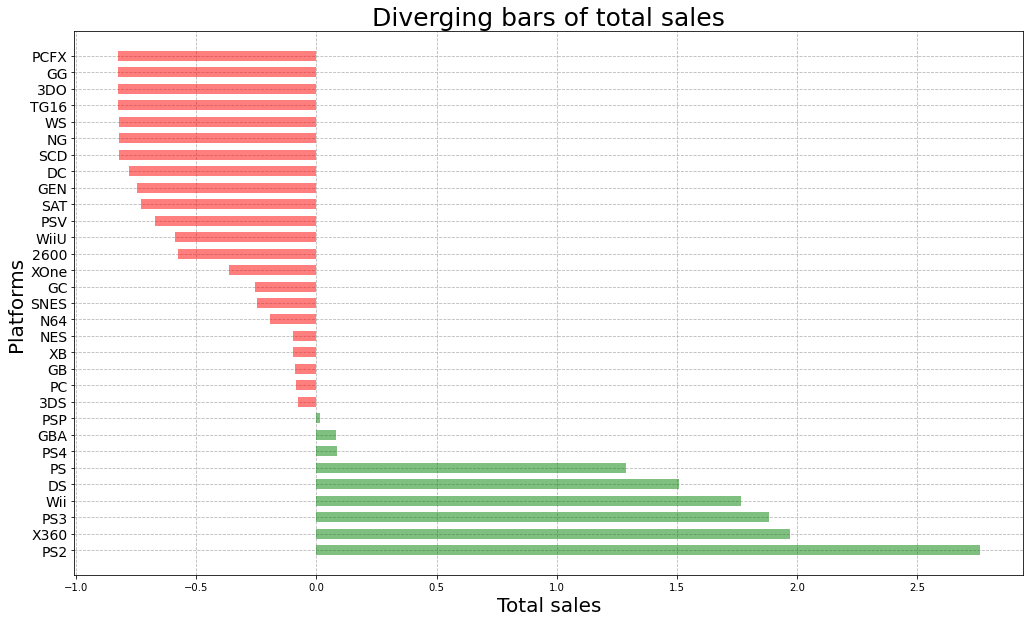

In [61]:
plt.figure(figsize=(17,10))

plt.title("Diverging bars of total sales", fontdict={'size':25})
plt.ylabel("Platforms", fontdict={'size':20})
plt.xlabel("Total sales", fontdict={'size':20})
plt.yticks(sales_by_platform.index, sales_by_platform.platform, fontsize=14)
plt.grid(linestyle='--', alpha=0.9)

plt.hlines(y = sales_by_platform['platform'], xmin = 0, 
          xmax = sales_by_platform['sales_z'], 
           color=sales_by_platform['colors'], alpha = 0.5, linewidth = 10)
plt.show()

We see that the most profitable platforms are the platforms that were released in 00's. Choose them for the further analysis (PSP, PS4, GBA, PS, DS, Wii, PS3, X360, PS2). Their total sales bigger than the mean of the total sales and lie in the range from 1 to 3 standard deviations.

<a class="anchor" id="section_3_2_2"></a>

<a class="anchor" id="previous14"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous13)

[Go to next section](#previous15)

- **Choose the platforms with the greatest total sales and build a distribution based on data for each year.**

In [62]:
df_games.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score    rating  \
0     28.96      3.77         8.45          76.0         8.0  everyone   
1      3.58      6.81         0.77           NaN         NaN   unknown   
2     12.76      3.79         3.29          82.0         8.3  everyone   
3     10.93      3.28         2.95          80.0         8.0  everyone   
4      8.89     10.22         1.00           NaN         NaN   unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

Take the platforms that we chose before - PSP, PS4, GBA, PS, DS, Wii, PS3, X360, PS2. Use the `query()` method to take only platforms from `sales_by_platform` where `colors == "green"`. Set the new dataframe to variable `top_sales_platforms`.

In [63]:
top_sales_platforms = sales_by_platform.query('colors == "green"')

Take only `platform` column and set to variable `platforms`. Use the `loc` function.

In [64]:
platforms = top_sales_platforms.loc[:, ['platform']]
platforms

platform
0      PS2
1     X360
2      PS3
3      Wii
4       DS
5       PS
6      PS4
7      GBA
8      PSP

Now merge `platforms` with original dataframe `df_games` to get only rows with games that were released on our chosen platfroms. Set merging `on='platform'`, `how='inner'`.

In [65]:
merge = platforms.merge(df_games, how='inner', on='platform')
merge.head()

platform                           name  year_of_release   genre  na_sales  \
0      PS2  Grand Theft Auto: San Andreas             2004  Action      9.43   
1      PS2    Grand Theft Auto: Vice City             2002  Action      8.41   
2      PS2         Gran Turismo 3: A-Spec             2001  Racing      6.85   
3      PS2           Grand Theft Auto III             2001  Action      6.99   
4      PS2                 Gran Turismo 4             2004  Racing      3.01   

   eu_sales  jp_sales  other_sales  critic_score  user_score    rating  \
0      0.40      0.41        10.57          95.0         9.0       17+   
1      5.49      0.47         1.78          95.0         8.7       17+   
2      5.09      1.87         1.16          95.0         8.4  everyone   
3      4.51      0.30         1.30          97.0         8.5       17+   
4      0.01      1.10         7.53          89.0         8.5  everyone   

   total_sales  
0        20.81  
1        16.15  
2        14.97  
3        13.10  
4        11.65

Check the result by using the `unique()` method on `platform` column.

In [66]:
merge.platform.unique()

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP'],
      dtype=object)

Create pivot_table from the variable `merge`. Set `index='year_of_release'`, `columns='platform'`, `values='total_sales'` and `aggfunc='sum'`. Save the result into variable `sales_by_platform_years`.

In [67]:
sales_by_platform_years = (
    merge
    .pivot_table(index='year_of_release',
                 columns='platform', 
                 values='total_sales', 
                 aggfunc='sum')
)
sales_by_platform_years

platform             DS    GBA      PS     PS2     PS3     PS4    PSP     Wii  \
year_of_release                                                                 
1985               0.02    NaN     NaN     NaN     NaN     NaN    NaN     NaN   
1994                NaN    NaN    6.03     NaN     NaN     NaN    NaN     NaN   
1995                NaN    NaN   35.96     NaN     NaN     NaN    NaN     NaN   
1996                NaN    NaN   94.70     NaN     NaN     NaN    NaN     NaN   
1997                NaN    NaN  136.17     NaN     NaN     NaN    NaN     NaN   
1998                NaN    NaN  169.49     NaN     NaN     NaN    NaN     NaN   
1999                NaN    NaN  144.53     NaN     NaN     NaN    NaN     NaN   
2000                NaN   0.07   96.37   39.17     NaN     NaN    NaN     NaN   
2001                NaN  61.53   35.59  166.43     NaN     NaN    NaN     NaN   
2002                NaN  74.16    6.67  205.38     NaN     NaN    NaN     NaN   
2003                NaN  56.67    2.07  184.31     NaN     NaN    NaN     NaN   
2004              17.27  77.91     NaN  211.81     NaN     NaN   7.06     NaN   
2005             130.14  33.86     NaN  160.66     NaN     NaN  43.84     NaN   
2006             119.81   5.28     NaN  103.42   20.96     NaN  55.32  137.15   
2007             146.94   3.40     NaN   75.99   73.19     NaN  46.93  152.77   
2008             145.31    NaN     NaN   53.90  118.52     NaN  34.55  171.32   
2009             119.54    NaN     NaN   26.40  130.93     NaN  37.78  206.97   
2010              85.02    NaN     NaN    5.64  142.17     NaN  35.04  127.95   
2011              26.18    NaN     NaN    0.45  156.78     NaN  17.82   59.65   
2012              11.01    NaN     NaN     NaN  107.36     NaN   7.69   21.71   
2013               1.54    NaN     NaN     NaN  113.25   25.99   3.14    8.59   
2014                NaN    NaN     NaN     NaN   47.76  100.00   0.24    3.75   
2015                NaN    NaN     NaN     NaN   16.82  118.90   0.12    1.14   
2016                NaN    NaN     NaN     NaN    3.60   69.25    NaN    0.18   

platform           X360  
year_of_release          
1985                NaN  
1994                NaN  
1995                NaN  
1996                NaN  
1997                NaN  
1998                NaN  
1999                NaN  
2000                NaN  
2001                NaN  
2002                NaN  
2003                NaN  
2004                NaN  
2005               8.25  
2006              51.62  
2007              95.41  
2008             135.26  
2009             120.29  
2010             170.03  
2011             143.84  
2012              99.74  
2013              88.58  
2014              34.74  
2015              11.96  
2016               1.52

Plot the lineplot from seaborn library for these platforms. Use `sales_by_platform_years` as a data for the lineplot. Set title, ylabel, the `x axis` tick locations and `xticklabels` (take column `'year_of_release'` from the `distr_by_year`).

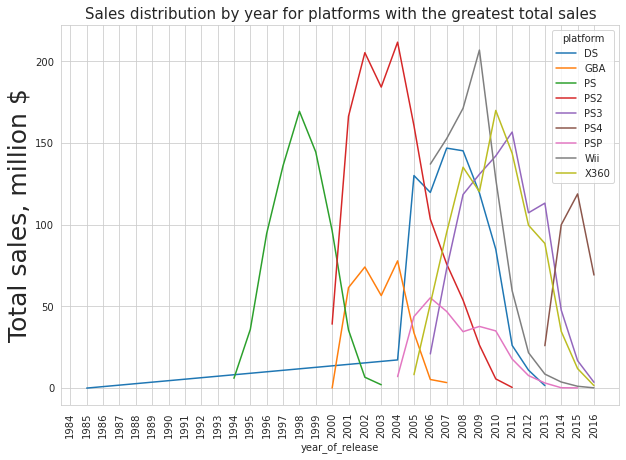

In [68]:
with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(10,7))
    
    ax.set_title("Sales distribution by year for platforms with the greatest total sales", 
             fontdict={'size':15})
    ax.set_ylabel("Total sales, million $", fontdict={'size':25})
    ax.set_xticks(distr_by_year['year_of_release'])
    ax.set_xticklabels(distr_by_year['year_of_release'], rotation=90, fontdict={'size':10})
    sns.lineplot(data=sales_by_platform_years, dashes=False)

We see the lifetime of each platform. Analyze it below.

<a class="anchor" id="section_3_2_3"></a>

<a class="anchor" id="previous15"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous14)

[Go to next section](#previous16)

- **Find platforms that used to be popular but now have zero sales. Find out how long it is generally take for new platforms to appear and old ones to fade.**

From this graph we see what:
- PS first released games in 1994 and finished in 2003 with peak sales in 1998.
- PS2 first released games in 2000 (right before PS fade) and finished in 2011 with peak sales between 2002 and 2004.
- PS3 first released games in 2006 and finished in 2016 with peak sales in 2011 (when it became most popular PS2 became unrelevant).
- PS4 first released games in 2013 and with peak sales in 2015 and it's steal popular because there isn't new version of PS. It can be popular 4-5 years more until PS5 will be released (approximately in 2020 - every 6 years appears new PS platform). According to previous statistic - every PS existed in average 10 years.  


- PSP first released games in 2004 and finished in 2015 with peak sales between 2005 and 2009. It's portable PlayStation, so it had less sales.


- Wii from Nintendo first released games in 2006 (started with huge sales first year - almost 150 millions dollars that was the record) and beated the all time record with peak sales of games on this platform in 2009 above 220 millions dollars. But sales fell sharply and after 2012 (when released Wii U). And finished to release games on this platform in 2016. Also it took 10 years for platform to exist with peak in the middle of period or even on the first 3 years.


- GBA (portable Game Boy from Nintendo) first released games in 2000 and finished in 2007 with peak sales between 2001 and 2004. It had less lifetime. Because it wasn't so popular as PS and had much less games sales.
- DS (next portable Game Boy from Nintendo) first released games in 2004 (after break almost 20 years -appears that it had the same name in 1985) and finished in 2013 with peak sales between 2005 and 2009. It had better sales than PSP (better than every portable platform, almost on the same level with main platforms and it was successful in the same time with 'big brother' Wii).


- X360 first released games in 2005 and finished in 2015 with peak sales in 2010.

<a class="anchor" id="section_3_2_4"></a>

<a class="anchor" id="previous16"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous15)

[Go to next section](#previous17)

#### Conclusion

In total, the 9 most popular platforms released their games from 1994 (only the PS), mostly between 2000 and 2004. The life cycle of every platform lasted 10 years - it appeared, peaked in sales, then faded away.  

According to the lollipop graph, there were the most games released between 2002 and 2011. There were fewer new games released after this period, and total sales weren't as high as they were in the past.

Additionally, we see that X360 and PS3 appeared in 2005 and 2006, and their graph forms and directions are identical. During the same period, they both grew and fell simultaneously. The PS4 already had better sales (the next Xbox, Xone, was released in the same year, but did not have the same success).

Nintendo's Wii had great success quickly and then fell as fast. Even though it was released at the same time as the PS3 and X360. In addition, the next Wii U, as well as the next Xone, were not as successful.

According to our analysis, PS, Xbox, and Wii are the most profitable and popular platforms. The PS3, X360, and Wii are outdated and do not release upcoming games. There are three new versions of these consoles in our prognosis: PS4, Xbox One, and Wii U, but PS4 remains the leader.

<a class="anchor" id="section_3_3"></a>

<a class="anchor" id="previous17"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous16)

[Go to next section](#previous18)

### Determine the period for analysis

- **Determine the period we should take for our anlysis. Decide it from previous two results. The data should allow us to build a prognosis for 2017.**

We should consider the platforms from the last generation that still have games released on them. However, it does not have enough information for us to analyze. Thus, we should take into account the period when game production began to grow and the first successful platforms (PS2) appeared.

So let's take the data from 2000. We want to compare new generation with previous that already finished their lifecycle. We want to see what sales new generation could make 5 years later. Or to check that new generations make less money and games bum already passed. Later we'll add new generation to our analysis to check what features they inherited from their predecessors.

In [69]:
data_new = df_games.query('year_of_release >= 2000')
data_new.head()

name platform  year_of_release     genre  na_sales  \
0             Wii Sports      Wii             2006    Sports     41.36   
2         Mario Kart Wii      Wii             2008    Racing     15.68   
3      Wii Sports Resort      Wii             2009    Sports     15.61   
6  New Super Mario Bros.       DS             2006  Platform     11.28   
7               Wii Play      Wii             2006      Misc     13.96   

   eu_sales  jp_sales  other_sales  critic_score  user_score    rating  \
0     28.96      3.77         8.45          76.0         8.0  everyone   
2     12.76      3.79         3.29          82.0         8.3  everyone   
3     10.93      3.28         2.95          80.0         8.0  everyone   
6      9.14      6.50         2.88          89.0         8.5  everyone   
7      9.18      2.93         2.84          58.0         6.6  everyone   

   total_sales  
0        82.54  
2        35.52  
3        32.77  
6        29.80  
7        28.91

<a class="anchor" id="section_3_3_1"></a>

<a class="anchor" id="previous18"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous17)

[Go to next section](#previous19)

#### Conclusion

Work only with the data that we've decided is relevant and disregard the data for previous years.

<a class="anchor" id="section_3_4"></a>

<a class="anchor" id="previous19"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous18)

[Go to next section](#previous20)

### Platforms leaders and outsiders

- **Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.**

Create pivot table for `data_new` grouped by `year_of_release`, with `columns='platform'` and sum `total_sales` as values. Set it to a new variable `df_sales`.

In [70]:
df_sales = pd.pivot_table(
    data_new, index='year_of_release', columns='platform', 
    values='total_sales', aggfunc='sum')
df_sales.tail()

platform           3DS  DC     DS  GB  GBA  GC  N64     PC  PS  PS2     PS3  \
year_of_release                                                               
2012             51.36 NaN  11.01 NaN  NaN NaN  NaN  23.22 NaN  NaN  107.36   
2013             56.57 NaN   1.54 NaN  NaN NaN  NaN  12.38 NaN  NaN  113.25   
2014             43.76 NaN    NaN NaN  NaN NaN  NaN  13.28 NaN  NaN   47.76   
2015             27.78 NaN    NaN NaN  NaN NaN  NaN   8.52 NaN  NaN   16.82   
2016             15.14 NaN    NaN NaN  NaN NaN  NaN   5.25 NaN  NaN    3.60   

platform            PS4   PSP    PSV  WS    Wii   WiiU   X360  XB   XOne  
year_of_release                                                           
2012                NaN  7.69  16.19 NaN  21.71  17.56  99.74 NaN    NaN  
2013              25.99  3.14  10.59 NaN   8.59  21.65  88.58 NaN  18.96  
2014             100.00  0.24  11.90 NaN   3.75  22.03  34.74 NaN  54.07  
2015             118.90  0.12   6.25 NaN   1.14  16.35  11.96 NaN  60.14  
2016              69.25   NaN   4.25 NaN   0.18   4.60   1.52 NaN  26.15

Use the `shift()` method with the parameter, called period, equel `+1` to shift values in a column one row down to check how sales changed Year-over-year (YOY). Set to a variable `sales_dynamics` and transpose the table.

In [71]:
sales_dynamics = (df_sales-df_sales.shift(+1)).T
sales_dynamics

year_of_release  2000    2001   2002   2003   2004    2005   2006   2007  \
platform                                                                   
3DS               NaN     NaN    NaN    NaN    NaN     NaN    NaN    NaN   
DC                NaN   -4.92  -0.78    NaN    NaN     NaN    NaN    NaN   
DS                NaN     NaN    NaN    NaN    NaN  112.87 -10.33  27.13   
GB                NaN  -10.52    NaN    NaN    NaN     NaN    NaN    NaN   
GBA               NaN   61.46  12.63 -17.49  21.24  -44.05 -28.58  -1.88   
GC                NaN     NaN  25.47  -1.20 -21.79   -1.20 -16.36 -10.99   
N64               NaN  -30.72  -3.17    NaN    NaN     NaN    NaN    NaN   
PC                NaN    0.81   3.10   0.27   1.55   -6.02  -1.52   6.43   
PS                NaN  -60.78 -28.92  -4.60    NaN     NaN    NaN    NaN   
PS2               NaN  127.26  38.95 -21.07  27.50  -51.15 -57.24 -27.43   
PS3               NaN     NaN    NaN    NaN    NaN     NaN    NaN  52.23   
PS4               NaN     NaN    NaN    NaN    NaN     NaN    NaN    NaN   
PSP               NaN     NaN    NaN    NaN    NaN   36.78  11.48  -8.39   
PSV               NaN     NaN    NaN    NaN    NaN     NaN    NaN    NaN   
WS                NaN   -0.40    NaN    NaN    NaN     NaN    NaN    NaN   
Wii               NaN     NaN    NaN    NaN    NaN     NaN    NaN  15.62   
WiiU              NaN     NaN    NaN    NaN    NaN     NaN    NaN    NaN   
X360              NaN     NaN    NaN    NaN    NaN     NaN  43.37  43.79   
XB                NaN   21.27  25.75   7.03  10.38  -16.34 -39.04  -9.49   
XOne              NaN     NaN    NaN    NaN    NaN     NaN    NaN    NaN   

year_of_release   2008   2009   2010   2011   2012   2013   2014   2015   2016  
platform                                                                        
3DS                NaN    NaN    NaN    NaN -11.84   5.21 -12.81 -15.98 -12.64  
DC                0.02    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
DS               -1.63 -25.77 -34.52 -58.84 -15.17  -9.47    NaN    NaN    NaN  
GB                 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
GBA                NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
GC                 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
N64                NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
PC                3.14   4.49   7.37  10.75 -11.81 -10.84   0.90  -4.76  -3.27  
PS                 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
PS2             -22.09 -27.50 -20.76  -5.19    NaN    NaN    NaN    NaN    NaN  
PS3              45.33  12.41  11.24  14.61 -49.42   5.89 -65.49 -30.94 -13.22  
PS4                NaN    NaN    NaN    NaN    NaN    NaN  74.01  18.90 -49.65  
PSP             -12.38   3.23  -2.74 -17.22 -10.13  -4.55  -2.90  -0.12    NaN  
PSV                NaN    NaN    NaN    NaN  11.56  -5.60   1.31  -5.65  -2.00  
WS                 NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
Wii              18.55  35.65 -79.02 -68.30 -37.94 -13.12  -4.84  -2.61  -0.96  
WiiU               NaN    NaN    NaN    NaN    NaN   4.09   0.38  -5.68 -11.75  
X360             39.85 -14.97  49.74 -26.19 -44.10 -11.16 -53.84 -22.78 -10.44  
XB               -0.37    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  
XOne               NaN    NaN    NaN    NaN    NaN    NaN  35.11   6.07 -33.99

Now, plot the heatmap that shows how sales on each platform changed YoY. Create subplots, assign it to the `fig, ax`. Set the `figsize=(15,10)`. Set the title and `ylabel`, `xlabel`. Plot the `heatmap` from the seaborn library, set annotation True (`annot=True`), colors of heatmap from blue to red (`cmap = 'RdBu_r'`), and widths of lines between cells (`linewidths=.5`). 

<AxesSubplot:title={'center':'Heatmap of sales Y-o-Y for each platform'}, xlabel='year_of_release', ylabel='platform'>

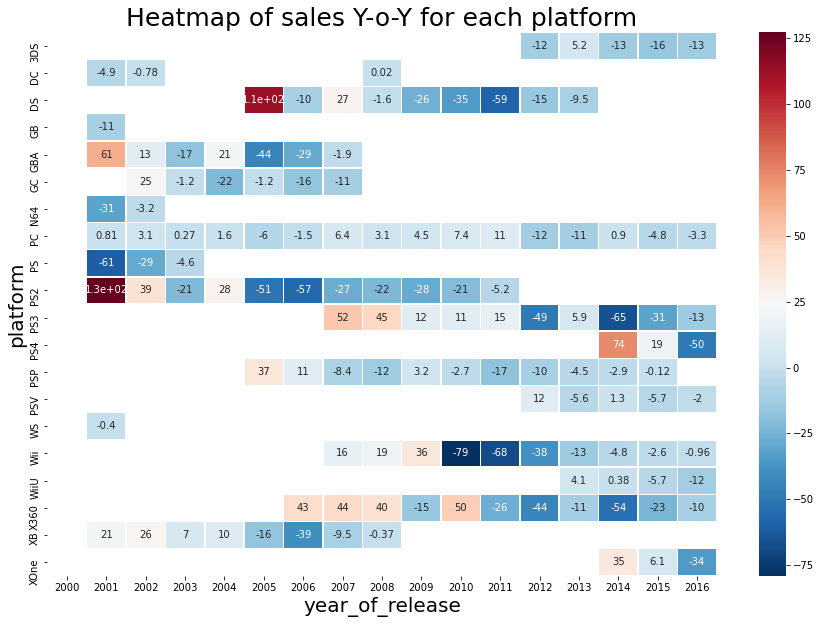

In [72]:
fig, ax = plt.subplots(figsize=(15,10))

ax.set_title("Heatmap of sales Y-o-Y for each platform", fontdict={'size':25})
ax.set_ylabel('Platforms', fontdict={'size':20})
ax.set_xlabel("Years", fontdict={'size':20})

sns.heatmap(sales_dynamics, annot=True, cmap = 'RdBu_r', linewidths=.5)

For each platform, we see a similar pattern - how game sales rise on each platform and then decrease, but in this case, we see a difference in color and numbers (in millions) YoY.

<a class="anchor" id="section_3_4_1"></a>

<a class="anchor" id="previous20"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous19)

[Go to next section](#previous21)

#### Conclusion 1

- `PS`: We see that the trend is about to fade in the early 00's. After a large drop in 2001 (-61 million), there is a slow decline through 2003 (-29 and -4.6 million).
- `PS2`: There was a huge growth in PS2 sales in 2001 compared to 2000 (over 130 million sales growth - probably because it was the first full year of that platform and there were new games created for it). Afterward, it grew but only by 39 million in 2002, and it remained at its peak until 2005, after which it experienced a sharp reduction in 2006 (-57 million) and slowly descended the following years (between -27 and -5.2 million per year loss).
- Compared to the year of release (2006), the `PS3` had grown fast in 2007 (+52 million) and in 2008 (+45 million). It was followed by three years of slight growth (+11-15 million every year) and then a reduction after 2012 (-49, -65, -31, and -13 million every year).
- `PS4`: huge growth for the first year (+74 million) and a big drop for 2016 (-50 million, nearly half of previous years' sales growth, but maybe there is not enough data for the last quarter of 2016). 


- The `Wii` started at a high point in sales, so we don't see a lot of growth in the first few years (+16, +19, +36 million) but we can see a steep drop after that in 2010, 2011, and 2012 (-79, -68, -38 million).


- `X360`: From 2006 to 2010, we saw almost five years of growth (+43, +44, +40, 2009 only -15 and +50 million). There were a lot of games on that platform that kept players and led to slow sales declines (-26, -44, -11, -54, -23, 10 million) in the following years. That's a good result. This is why X360 has ranked second in total sales after PS2 for all time.


- The heatmap shows platforms that aren't in the top 9 platforms (since we chose every platform that had sales after 2000), which the line plot doesn't. As a result, we can compare platforms like XOne, WiiU, and PS4 (only PS4 was at the top). There has been very slow growth in WiiU (+4.1, +0.38 million) and -5.7, -12 million reductions in the last two years. PS4 had a much bigger growth rate and better sales overall. XOne did better than WiiU (+35, +6.1, but -34 million last year).

<a class="anchor" id="section_3_4_2"></a>

<a class="anchor" id="previous21"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous20)

[Go to next section](#previous22)

**Now check the distribution of number of games on each platform above. Create the list of chosen platforms.**

In [73]:
platforms_list = ['WiiU', 'PC', '3DS', 'PSP', 'XOne', 'PS4', 'GBA', 'PS', 'DS', 'Wii', 
                  'PS3', 'X360', 'PS2']
platforms_list

['WiiU',
 'PC',
 '3DS',
 'PSP',
 'XOne',
 'PS4',
 'GBA',
 'PS',
 'DS',
 'Wii',
 'PS3',
 'X360',
 'PS2']

Use the `query()` to create dataframe where `year_of_release >=2000` and `platform in @platforms_list`. 

In [74]:
games_platforms = df_games.query('year_of_release >=2000 and platform in @platforms_list')
games_platforms.platform.unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'GBA', 'PS4', '3DS', 'PC',
       'PSP', 'XOne', 'WiiU', 'PS'], dtype=object)

Build a pivot table where `index ='year_of_release'`, `columns='platform`' and count the game's names for each year of the chosen platform. Set the variable's name to `games_distr`.

In [75]:
games_distr = games_platforms.pivot_table(index='year_of_release', 
                     columns='platform', values='name', aggfunc='count')
games_distr

platform           3DS     DS    GBA     PC     PS    PS2    PS3    PS4  \
year_of_release                                                           
2000               NaN    NaN    1.0    7.0  160.0   82.0    NaN    NaN   
2001               NaN    NaN  107.0   15.0   91.0  185.0    NaN    NaN   
2002               NaN    NaN  198.0   19.0   20.0  280.0    NaN    NaN   
2003               NaN    NaN  150.0   33.0    3.0  256.0    NaN    NaN   
2004               NaN   23.0  175.0   30.0    NaN  259.0    NaN    NaN   
2005               NaN  118.0  135.0   37.0    NaN  260.0    NaN    NaN   
2006               NaN  201.0   39.0   52.0    NaN  259.0   27.0    NaN   
2007               NaN  376.0    6.0   62.0    NaN  214.0   90.0    NaN   
2008               NaN  492.0    NaN   76.0    NaN  191.0  138.0    NaN   
2009               NaN  403.0    NaN  107.0    NaN   96.0  162.0    NaN   
2010               NaN  323.0    NaN   90.0    NaN   38.0  181.0    NaN   
2011             116.0  153.0    NaN  139.0    NaN    7.0  215.0    NaN   
2012              93.0   23.0    NaN   61.0    NaN    NaN  148.0    NaN   
2013              91.0    8.0    NaN   38.0    NaN    NaN  126.0   16.0   
2014              80.0    NaN    NaN   47.0    NaN    NaN  108.0   75.0   
2015              86.0    NaN    NaN   50.0    NaN    NaN   73.0  137.0   
2016              46.0    NaN    NaN   54.0    NaN    NaN   38.0  164.0   

platform           PSP    Wii  WiiU   X360  XOne  
year_of_release                                   
2000               NaN    NaN   NaN    NaN   NaN  
2001               NaN    NaN   NaN    NaN   NaN  
2002               NaN    NaN   NaN    NaN   NaN  
2003               NaN    NaN   NaN    NaN   NaN  
2004              15.0    NaN   NaN    NaN   NaN  
2005              95.0    NaN   NaN   18.0   NaN  
2006             189.0   44.0   NaN   93.0   NaN  
2007             133.0  185.0   NaN  123.0   NaN  
2008             100.0  282.0   NaN  146.0   NaN  
2009             161.0  325.0   NaN  172.0   NaN  
2010             188.0  253.0   NaN  182.0   NaN  
2011             139.0  143.0   NaN  206.0   NaN  
2012             106.0   31.0  32.0  106.0   NaN  
2013              54.0   12.0  42.0   75.0  19.0  
2014              10.0    6.0  31.0   63.0  61.0  
2015               3.0    4.0  28.0   35.0  80.0  
2016               NaN    1.0  14.0   13.0  87.0

For these platforms, plot the lineplot from the Seaborn library. Use `games_distr` as a data for the lineplot. Set title, ylabel, the x axis tick locations and `xticklabels` (take column `'year_of_release'` from the `distr_by_year`).

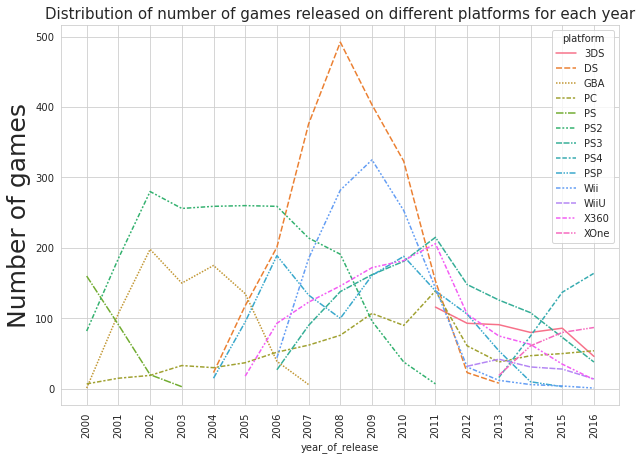

In [76]:
with sns.plotting_context(font_scale=1.5), sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(10,7))
    
    ax.set_title(
        "Distribution of number of games released on different platforms for each year", 
             fontdict={'size':15})
    ax.set_ylabel("Number of games", fontdict={'size':25})
    ax.set_xticks(distr_by_year['year_of_release'])
    ax.set_xticklabels(distr_by_year['year_of_release'], rotation=90, fontdict={'size':10})
    sns.lineplot(data=games_distr)#, dashes=False)

<a class="anchor" id="section_3_4_3"></a>

<a class="anchor" id="previous22"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous21)

[Go to next section](#previous23)

#### Conclusion 2

- In the years 2007 to 2010, many games were released on the `DS` platform, contributing to its total sales. On the `DS` were released more games than on any other platform. However, it did not help them make more sales than their competitors.
- All the platforms are shrinking now, even the new generation `WiiU`. But we might not have full data for the last year.
- Only 3 platforms are growing - `PS4`, `XOne` and `PC` (after drop in the number of games started to grow YoY).
- `3DS` from the first year started slowly decrease in terms of number of games released each year.
- `PS3` still has some games released, also `X360`, `WiiU`, but others 'died'.
- We can consider to the next year prognosis only games released on `PS4`, `XOne`, `3DS` and `PC`.

<a class="anchor" id="section_3_5"></a>

<a class="anchor" id="previous23"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous22)

[Go to next section](#previous24)

### Boxplot for games total sales by different platforms

- Create a boxplot for worldwide sales of all games, broken down by platform. Check whether the differences in sales are significant. What about the average sales on the different platforms? Describe our findings.

Create order of platforms here from the variable `platforms`. We'll use in the `sns.boxplot()`.

In [77]:
order = platforms_list
order

['WiiU',
 'PC',
 '3DS',
 'PSP',
 'XOne',
 'PS4',
 'GBA',
 'PS',
 'DS',
 'Wii',
 'PS3',
 'X360',
 'PS2']

Transform `platforms_list` to dataframe. Use `pd.DataFrame()`. Set the name of the column to `platform`. This sets the order of our medians, which we will calculate below.

In [78]:
df_platforms_list = pd.DataFrame(platforms_list)
df_platforms_list.set_axis(['platform'], axis=1, inplace=True)
df_platforms_list

platform
0      WiiU
1        PC
2       3DS
3       PSP
4      XOne
5       PS4
6       GBA
7        PS
8        DS
9       Wii
10      PS3
11     X360
12      PS2

Group the `games_platforms` (sales after 2000 and only chosen platforms) by `platform` and `year_of_release` and sum all `total_sales` for it. Reset index and set it to the variable `sales_by_platform_grouped`.

In [79]:
sales_by_platform_grouped = games_platforms.groupby(
    ['platform', 'year_of_release'])['total_sales'].sum().reset_index()
sales_by_platform_grouped.head()

platform  year_of_release  total_sales
0      3DS             2011        63.20
1      3DS             2012        51.36
2      3DS             2013        56.57
3      3DS             2014        43.76
4      3DS             2015        27.78

Calculate the median sales for each platform for all years. Group by `platform`.

In [80]:
medians = sales_by_platform_grouped.groupby('platform')['total_sales'].median().sort_values()
medians

platform
PC        9.280
WiiU     17.560
PS       21.130
PSP      26.185
XOne     40.110
GBA      45.265
3DS      47.560
Wii      59.650
PS4      84.625
PS2      89.705
X360     91.995
DS      102.280
PS3     107.360
Name: total_sales, dtype: float64

Merge again the results in `medians` with `df_platforms_list` to get the right order and loc only `total_sales` column. We'll use this order for annotation on boxplot.

In [81]:
medians_order = df_platforms_list.merge(medians, how='inner', on='platform')['total_sales']
medians_order

0      17.560
1       9.280
2      47.560
3      26.185
4      40.110
5      84.625
6      45.265
7      21.130
8     102.280
9      59.650
10    107.360
11     91.995
12     89.705
Name: total_sales, dtype: float64

Plot the boxplot for these platforms. Use boxplot from the seaborn library. Set title, x,ylabels and grid. Make it sorted by revenue from the list of platforms `order`.

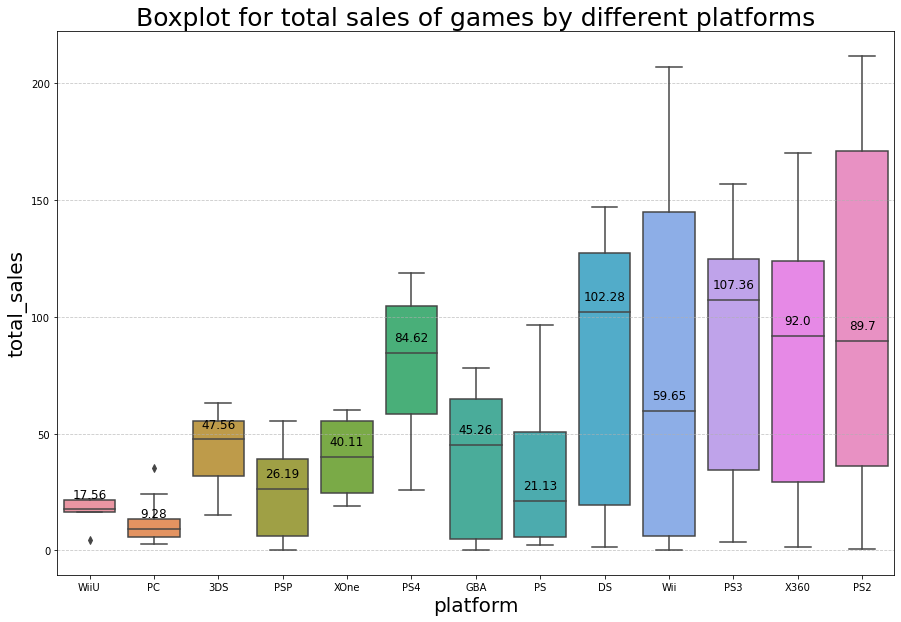

In [82]:
plt.figure(figsize=(15,10))

plt.title("Boxplot for total sales of games by different platforms", fontdict={'size':25})
plt.xlabel('Platforms', fontdict={'size':20})
plt.ylabel('Total sales', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.7)

box = sns.boxplot(x='platform', y='total_sales', data=sales_by_platform_grouped, order=order)

for i in range(len(medians_order)):
    box.annotate(str(round(medians_order[i], 2)), xy=(i, medians_order[i]+5), 
                 size=12, horizontalalignment = 'center')
    
plt.show()

<a class="anchor" id="section_3_5_1"></a>

<a class="anchor" id="previous24"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous23)

[Go to next section](#previous25)

#### Conclusion

- We can see that the differences in sales are significant.
- `PS2` and `Wii` have a wide range of total sales in different years (from almost zero to over 200 million), but `PS2` has higher average sales (89.7 million) compared to `Wii`'s 59.65 million.
- For `Wii` it has been more weak years, so the average sales are lower than the for `PS2`.
- The `PS4` has higher sales each year, so the median value is high - 84.62 (but only because this platform is new and it did not weaken and did not fall to zero sales). The same is true for the `XOne`, `3DS` and the `WiiU`. But they have lower sales figures.
- All platforms that shrink have values close to zero.

<a class="anchor" id="section_3_6"></a>

<a class="anchor" id="previous25"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous24)

[Go to next section](#previous26)

### Correlation between reviews and total sales

- Take a look at how user and professional reviews affect sales for one popular platform. Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

Create the new variable `data_scores` from the `games_platforms` and take only `platform`, `total_sales`, `critic_score` and `user_score` columns.

In [83]:
data_scores = games_platforms[['platform', 
                         'total_sales', 'critic_score', 'user_score']]
data_scores.head()

platform  total_sales  critic_score  user_score
0      Wii        82.54          76.0         8.0
2      Wii        35.52          82.0         8.3
3      Wii        32.77          80.0         8.0
6       DS        29.80          89.0         8.5
7      Wii        28.91          58.0         6.6

Write function `score_effect(platform` to plot scatterplots and calculate correlations for chosen platform and score type:
- Create a loop for to create all charts and calculations for the selected platforms.
- Inside the loop, create a dataframe `data` from the dataframe `data_scores` where we take only the platform named as the `score_effect`s argument and leaving only the `total_sales`, `critic_score` and `user_score` columns.
- Next, draw the scatter plots where the coordinates of the points on the x-axis are the ratings and on the y-axis are the total sales. Set the legend, title and labels.
- The next step is to calculate the correlation between `total_sales` and one of the score_type. Use the 'corr()' method.
- Then print the result and the conclusion - `Correlation is positive` if the result is greater than 70%. Otherwise - `There is no correlation`.

In [84]:
def score_effect(platform):

    data = data_scores[data_scores['platform'] == platform][['total_sales', 'critic_score', 'user_score']]
    data.dropna(inplace=True)
    fig, ax = plt.subplots(figsize=(10, 7))
    
    ax.scatter(data['critic_score'] / 10, 
               data['total_sales'], 
               color='#FF9F29',
               marker = "x",
               alpha=0.5, 
               label='critic score')
    ax.scatter(data['user_score'], 
               data['total_sales'], 
               color='green', 
               marker = "x",
               alpha=0.3, 
               label='user score')
            
    ax.legend()
    ax.set_title('Correlation between user score/critic score and total sales for {}'.format(platform), 
                 fontdict={'size':15})
    ax.set_xlabel('Rating', fontdict={'size':15})
    ax.set_ylabel('Total sales', fontdict={'size':15})
    plt.show()
    
    critic_score_corr = data['total_sales'].corr(data['critic_score'])
    user_score_corr = data['total_sales'].corr(data['user_score'])
    
    print('Correlation between critic_score and total sales on the', platform, 
          'is {:.2%}'.format(critic_score_corr))
    
    
    if critic_score_corr > 70:
        result = 'Correlation is positive'
    else: 
        result = 'There is no correlation'
        print(result)
        
    print('----------------------------------------------------------------------')
    
    print('Correlation between user_score and total sales on the', platform, 
          'is {:.2%}'.format(user_score_corr))
    
    if user_score_corr > 70:
        result = 'Correlation is positive'
    else: 
        result = 'There is no correlation'
        print(result)
    print('----------------------------------------------------------------------')

Take a list of the top platforms and put them in a loop to compare different platforms results.

In [85]:
top_platforms_list = ['PS2', 'X360', 'PS3', 'Wii', 'WiiU', 'XOne', 'PS4', '3DS', 'PC']
top_platforms_list

['PS2', 'X360', 'PS3', 'Wii', 'WiiU', 'XOne', 'PS4', '3DS', 'PC']

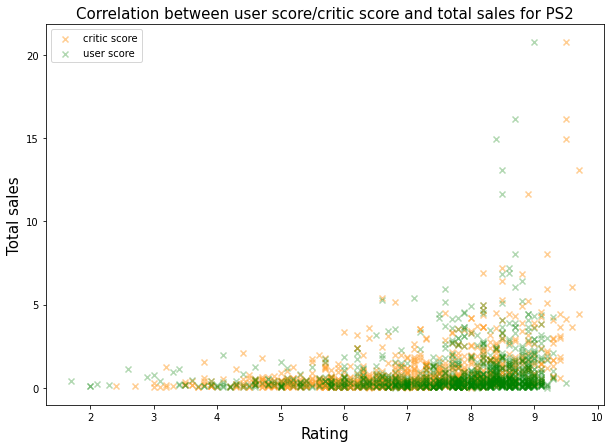

Correlation between critic_score and total sales on the PS2 is 38.64%
There is no correlation
----------------------------------------------------------------------
Correlation between user_score and total sales on the PS2 is 17.17%
There is no correlation
----------------------------------------------------------------------


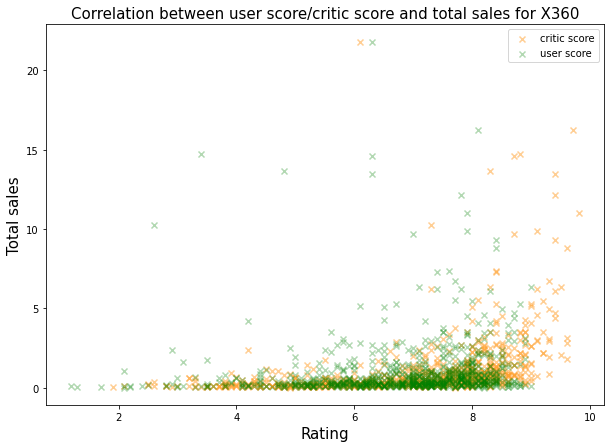

Correlation between critic_score and total sales on the X360 is 38.90%
There is no correlation
----------------------------------------------------------------------
Correlation between user_score and total sales on the X360 is 11.03%
There is no correlation
----------------------------------------------------------------------


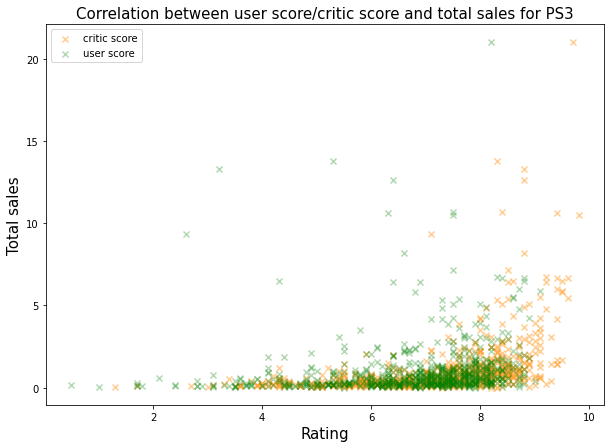

Correlation between critic_score and total sales on the PS3 is 42.82%
There is no correlation
----------------------------------------------------------------------
Correlation between user_score and total sales on the PS3 is 14.40%
There is no correlation
----------------------------------------------------------------------


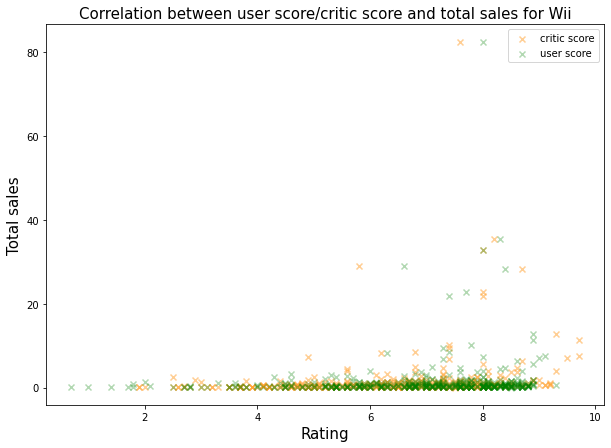

Correlation between critic_score and total sales on the Wii is 17.09%
There is no correlation
----------------------------------------------------------------------
Correlation between user_score and total sales on the Wii is 11.06%
There is no correlation
----------------------------------------------------------------------


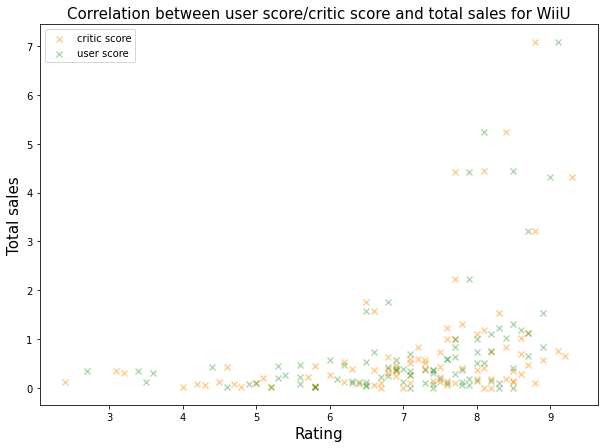

Correlation between critic_score and total sales on the WiiU is 35.09%
There is no correlation
----------------------------------------------------------------------
Correlation between user_score and total sales on the WiiU is 39.18%
There is no correlation
----------------------------------------------------------------------


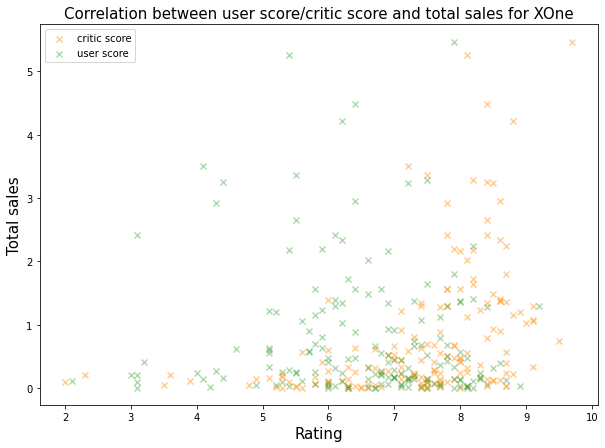

Correlation between critic_score and total sales on the XOne is 41.04%
There is no correlation
----------------------------------------------------------------------
Correlation between user_score and total sales on the XOne is -9.40%
There is no correlation
----------------------------------------------------------------------


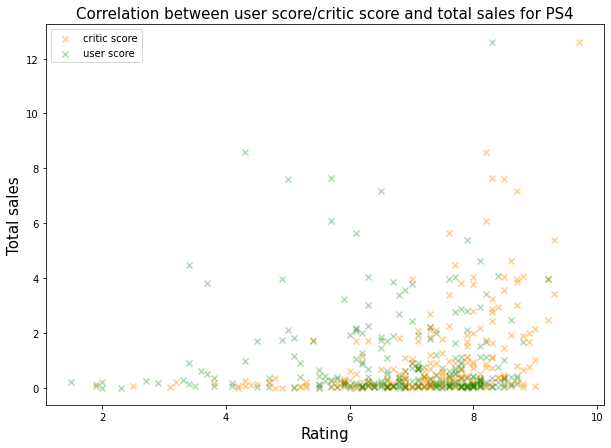

Correlation between critic_score and total sales on the PS4 is 40.59%
There is no correlation
----------------------------------------------------------------------
Correlation between user_score and total sales on the PS4 is -3.36%
There is no correlation
----------------------------------------------------------------------


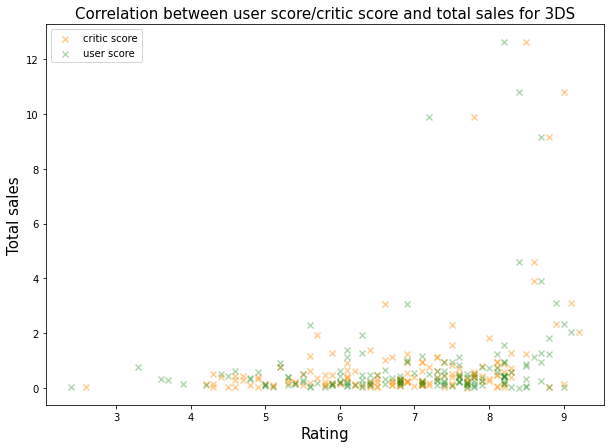

Correlation between critic_score and total sales on the 3DS is 33.89%
There is no correlation
----------------------------------------------------------------------
Correlation between user_score and total sales on the 3DS is 23.21%
There is no correlation
----------------------------------------------------------------------


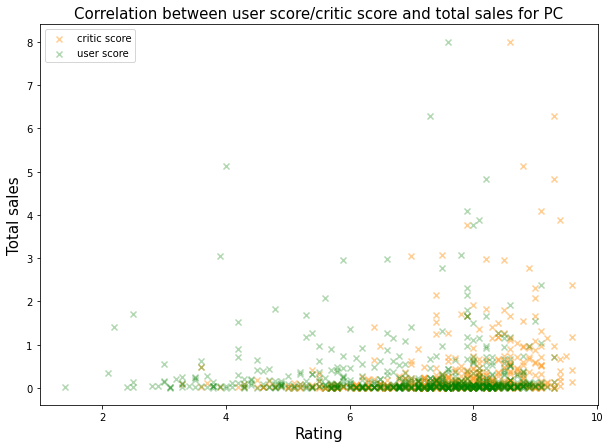

Correlation between critic_score and total sales on the PC is 24.95%
There is no correlation
----------------------------------------------------------------------
Correlation between user_score and total sales on the PC is -1.09%
There is no correlation
----------------------------------------------------------------------


In [86]:
for platform in top_platforms_list:
    score_effect(platform)

- Many games did not produce high profits. And different ratings did not have much effect on winnings. Games with higher ratings tended to have higher total sales, but the correlation was low.

<a class="anchor" id="section_3_6_1"></a>

<a class="anchor" id="previous26"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous25)

[Go to next section](#previous27)

#### Conclusion

- We do not see a high correlation between ratings and total sales. For some games, sales were big enough and they had high ratings. But other games with high ratings had both high and low sales. So it was more random.
- The correlation between `critic_score` and `total_sales` ranges from 17.09% (for `Wii`) to 42.82% (for `PS3`), which is low correlation.
- The correlation between `user_score` and `total_sales` ranges from -9.40% (for `XOne`) to 39.18% (for `WiiU`). It is interesting to note that for the newest platforms - `PS4`, `XOne` and also for `PC` - the user score shows a negative correlation, meaning that even games with a low user score can achieve high total sales. The reason could be that people have been waiting for some games, read good critic reviews before they bought it, then were disappointed and gave bad ratings. However the game already got high sales. Thus, user score has lower impact or null impact on sales.

<a class="anchor" id="section_3_7"></a>

<a class="anchor" id="previous27"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous26)

[Go to next section](#previous28)

### General distribution of games by genre

- Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can we generalize about genres with high and low sales?

Count how many games each genre are in our dataset `games_platforms`. For that group by `genre` and count `name` column. Sort the values by `name` in descending order and reset the index. After that, take only the columns `genre` and `name`.

In [87]:
genres_count = (
    games_platforms
    .groupby('genre')['name']
    .count()
    .reset_index()
    .sort_values(by='name', ascending=False)
    .reset_index()
)
genres_count = genres_count.loc[:, ['genre', 'name']]
genres_count.columns = ['genre', 'n_games']
genres_count

genre  n_games
0         Action     2664
1         Sports     1660
2           Misc     1490
3   Role-Playing     1147
4      Adventure     1045
5        Shooter      947
6         Racing      829
7     Simulation      726
8       Platform      574
9       Fighting      526
10      Strategy      504
11        Puzzle      452

Calculate the `market_share` of genre by number of games released in each genre.

In [88]:
genres_count['market_share'] = round((
    genres_count['n_games'] / genres_count['n_games'].sum()) * 100, 2)
genres_count

genre  n_games  market_share
0         Action     2664         21.20
1         Sports     1660         13.21
2           Misc     1490         11.86
3   Role-Playing     1147          9.13
4      Adventure     1045          8.32
5        Shooter      947          7.54
6         Racing      829          6.60
7     Simulation      726          5.78
8       Platform      574          4.57
9       Fighting      526          4.19
10      Strategy      504          4.01
11        Puzzle      452          3.60

Create the `genres_count_order` variable converted to list. We'll use it in our barplot.

In [89]:
genres_count_order = genres_count.genre.to_list()
genres_count_order

['Action',
 'Sports',
 'Misc',
 'Role-Playing',
 'Adventure',
 'Shooter',
 'Racing',
 'Simulation',
 'Platform',
 'Fighting',
 'Strategy',
 'Puzzle']

Plot the `barplot` from the seaborn library to show distribution of games by genre and `lineplot` to show `Market share` of genre by number of games. Create second scale on the same graph for market share in %. Set `ax2 = ax1.twinx()`. Set title, two ylabel and xlabel. For xticklabels set `genres_count['genre']`.

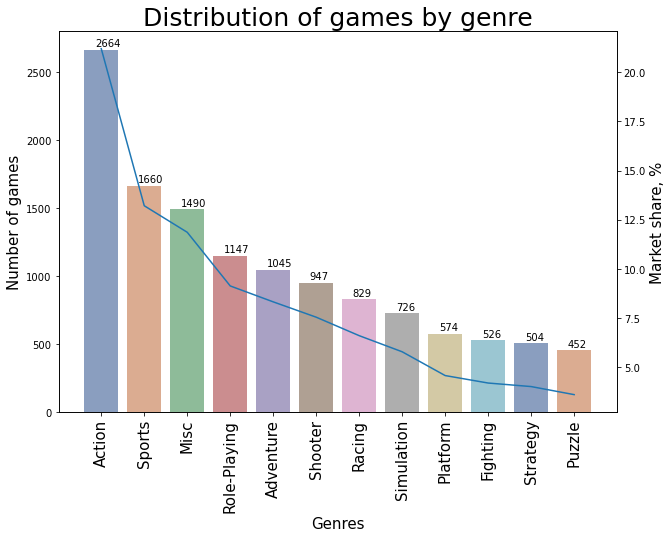

In [90]:
fig, ax1 = plt.subplots(figsize=(10,7))


sns.barplot(data=genres_count, x='genre', y='n_games', 
            order=genres_count_order, 
            palette="deep", alpha=0.7, ax=ax1)

ax2 = ax1.twinx()
sns.lineplot(data=genres_count['market_share'])

plt.title('Distribution of games by genre', fontdict={'size':25})
ax1.set_ylabel('Number of games', fontdict={'size':15})
ax2.set_ylabel('Market share, %', fontdict={'size':15})
ax1.set_xlabel("Genres", fontdict={'size':15})

ax1.set_xticklabels(genres_count_order, rotation=90, fontdict={'size':15})


for i, (x, y) in enumerate(genres_count['n_games'].to_dict().items()):
    ax1.text(i-.15, y+25, s=str(y), fontsize=10)
    
plt.show()

Calculate `total_sales` for each genre. For that group by `genre` and sum `total_sales` column. Sort values by `total_sales` in descending order and reset index. Take only `genre` and `total_sales` columns.

In [91]:
genres_sales = (
    games_platforms.
    groupby('genre')['total_sales']
    .sum()
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
)
genres_sales = genres_sales.loc[:, ['genre', 'total_sales']]
genres_sales

genre  total_sales
0         Action      1409.80
1         Sports      1037.30
2        Shooter       832.30
3           Misc       685.93
4   Role-Playing       676.63
5         Racing       500.71
6       Platform       443.96
7     Simulation       319.04
8       Fighting       274.75
9      Adventure       167.79
10        Puzzle       130.72
11      Strategy       103.44

Calculate the `market_share` of each genre by total sales.

In [92]:
genres_sales['market_share'] = round((
    genres_sales['total_sales'] / genres_sales['total_sales'].sum()) *100, 2)
genres_sales

genre  total_sales  market_share
0         Action      1409.80         21.42
1         Sports      1037.30         15.76
2        Shooter       832.30         12.64
3           Misc       685.93         10.42
4   Role-Playing       676.63         10.28
5         Racing       500.71          7.61
6       Platform       443.96          6.74
7     Simulation       319.04          4.85
8       Fighting       274.75          4.17
9      Adventure       167.79          2.55
10        Puzzle       130.72          1.99
11      Strategy       103.44          1.57

Create the `genres_sales_order` variable converted to list. We'll use it in our barplot.

In [93]:
genres_sales_order = genres_sales.genre.to_list()
genres_sales_order

['Action',
 'Sports',
 'Shooter',
 'Misc',
 'Role-Playing',
 'Racing',
 'Platform',
 'Simulation',
 'Fighting',
 'Adventure',
 'Puzzle',
 'Strategy']

Make the same for the most profitable genres.

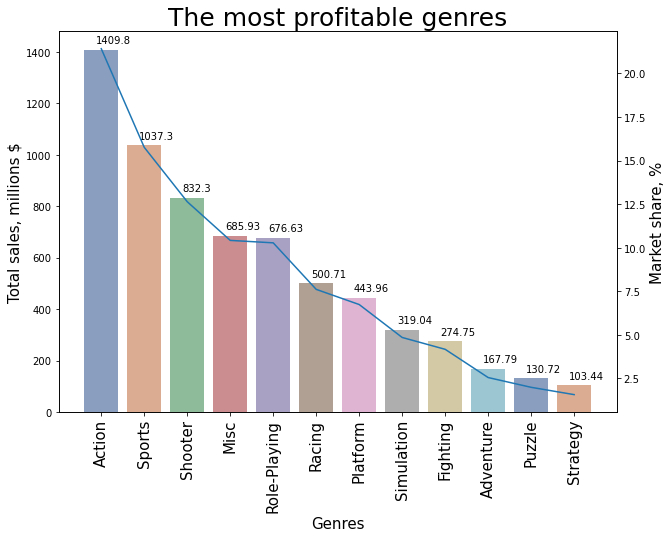

In [94]:
fig, ax1 = plt.subplots(figsize=(10,7))

sns.barplot(data=genres_sales, x='genre', y='total_sales', 
            order=genres_sales_order, palette="deep", 
            alpha=0.7, ax=ax1)

ax2 = ax1.twinx()
sns.lineplot(data=genres_sales['market_share'])

plt.title('The most profitable genres', fontdict={'size':25})
ax1.set_ylabel('Total sales, millions $', fontdict={'size':15})
ax2.set_ylabel('Market share, %', fontdict={'size':15})
ax1.set_xlabel("Genres", fontdict={'size':15})

ax1.set_xticklabels(genres_sales['genre'], rotation=90, fontdict={'size':15})

for i, (x, y) in enumerate(round(genres_sales['total_sales'], 2).to_dict().items()):
    ax1.text(i-.12, y+25, s=str(y), fontsize=10)
    
plt.show()

But how about we take the average sales per game in each genre. Let us do that.

In [95]:
genres_sales = (
    games_platforms.
    groupby('genre')['total_sales']
    .sum()
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
)
genres_sales = genres_sales.loc[:, ['genre', 'total_sales']]
genres_sales

genre  total_sales
0         Action      1409.80
1         Sports      1037.30
2        Shooter       832.30
3           Misc       685.93
4   Role-Playing       676.63
5         Racing       500.71
6       Platform       443.96
7     Simulation       319.04
8       Fighting       274.75
9      Adventure       167.79
10        Puzzle       130.72
11      Strategy       103.44

In [96]:
avg_sales_per_genre = (
    games_platforms
    .groupby('genre')['total_sales']
    .mean()
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
    .reset_index()
    .round(2)
)
avg_sales_per_genre = avg_sales_per_genre.loc[:, ['genre', 'total_sales']]
avg_sales_per_genre.columns = ['genre', 'avg_sales_per_game']
avg_sales_per_genre

genre  avg_sales_per_game
0        Shooter                0.88
1       Platform                0.77
2         Sports                0.62
3         Racing                0.60
4   Role-Playing                0.59
5         Action                0.53
6       Fighting                0.52
7           Misc                0.46
8     Simulation                0.44
9         Puzzle                0.29
10      Strategy                0.21
11     Adventure                0.16

In [97]:
avg_sales_per_genre_order = avg_sales_per_genre.genre.to_list()
avg_sales_per_genre_order

['Shooter',
 'Platform',
 'Sports',
 'Racing',
 'Role-Playing',
 'Action',
 'Fighting',
 'Misc',
 'Simulation',
 'Puzzle',
 'Strategy',
 'Adventure']

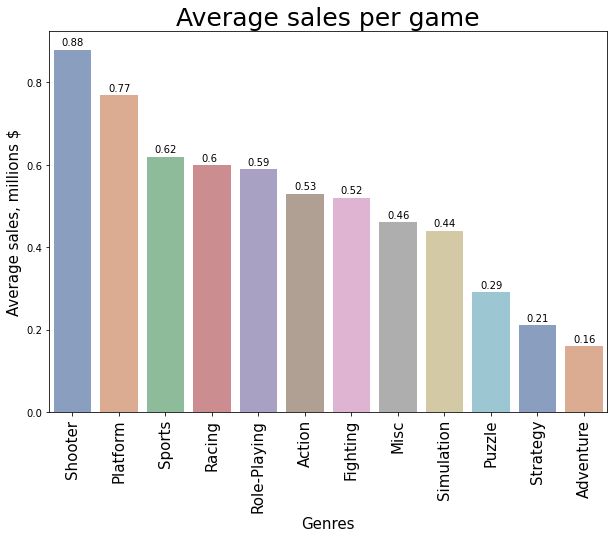

In [98]:
fig, ax1 = plt.subplots(figsize=(10,7))

sns.barplot(data=avg_sales_per_genre, x='genre', y='avg_sales_per_game', 
            order=avg_sales_per_genre_order, palette="deep",
            alpha=0.7, ax=ax1)

plt.title('Average sales per game', fontdict={'size':25})
ax1.set_ylabel('Average sales, millions $', fontdict={'size':15})
ax1.set_xlabel("Genres", fontdict={'size':15})

ax1.set_xticklabels(avg_sales_per_genre['genre'], rotation=90, fontdict={'size':15})

for i, (x, y) in enumerate(round(avg_sales_per_genre['avg_sales_per_game'], 2).to_dict().items()):
    ax1.text(i-.23, y+0.01, s=str(y), fontsize=10)
    
plt.show()

<a class="anchor" id="section_3_7_1"></a>

<a class="anchor" id="previous28"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous27)

[Go to next section](#previous29)

#### Conclusion

- We have the `Action` genre in first place with a market share of 21.20% of games in this genre and a market share of total sales - 21.42%. So, the fifth part of all games on the market belongs to the `Action` genre and accounts for the fifth part of the total sales.

- The top 5 genres by sales are `Action` (21.42% of market share), `Sports` (15.76%), `Shooter` (12.64%), `Misc` (10.42%), `Role-Playing` (10.28%)

- The top 5 genres by number of games are `Action` (21.20% of market share), `Sports` (13.21%), `Misc` (11.86%), `Role-Playing` (9.13%), `Adventure` (8.32%). 

- In terms of the number of games, `Shooter` holds only 7.54% of the market share, but makes 12.64% of the market's sales (0.88 million per game).

- While `Adventure` has a market share of 8.32% based on the number of games, it generates only 2.55% of total sales (0.16 million per game).

- So we can conclude that the most successful genre is `Shooter` - fewer different games bring more revenue. With over `$3 billion` combined for the last 16 years on the most popular platforms - `Action`, `Sports` and `Shooter` have been the most profitable genres.

<a class="anchor" id="section_3_8"></a>

<a class="anchor" id="previous29"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous28)

[Go to next section](#previous30)

## Create a user profile for each region

For each region (NA, EU, JP), determine:
- The top five platforms. Describe variations in their market shares from region to region.
- The top five genres. Explain the difference.
- Do ESRB ratings affect sales in individual regions?

For the user profile we'll take only platforms that have games released after 2011.

In [99]:
latest_platforms_list = ['WiiU', 'Wii', #'PC', 
                         '3DS', 'DS', 'XOne', 'X360', 'PS4', 'PS3', 'PSP']
latest_platforms_list

['WiiU', 'Wii', '3DS', 'DS', 'XOne', 'X360', 'PS4', 'PS3', 'PSP']

Use the `query()` to create dataframe where `year_of_release >=2011` and `platform in @latest_platforms_list`. 

In [100]:
user_profile = df_games.query('year_of_release >=2011 and platform in @latest_platforms_list')
user_profile.platform.unique()

array(['PS3', 'X360', 'PS4', '3DS', 'Wii', 'DS', 'XOne', 'WiiU', 'PSP'],
      dtype=object)

In [101]:
user_profile.head()

name platform  year_of_release         genre  \
16              Grand Theft Auto V      PS3             2013        Action   
23              Grand Theft Auto V     X360             2013        Action   
29  Call of Duty: Modern Warfare 3     X360             2011       Shooter   
31       Call of Duty: Black Ops 3      PS4             2015       Shooter   
33             Pokemon X/Pokemon Y      3DS             2013  Role-Playing   

    na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
16      7.02      9.09      0.98         3.96          97.0         8.2   
23      9.66      5.14      0.06         1.41          97.0         8.1   
29      9.04      4.24      0.13         1.32          88.0         3.4   
31      6.03      5.86      0.36         2.38           NaN         NaN   
33      5.28      4.19      4.35         0.78           NaN         NaN   

     rating  total_sales  
16      17+        21.05  
23      17+        16.27  
29      17+        14.73  
31  unknown        14.63  
33  unknown        14.60

<a class="anchor" id="section_3_8_1"></a>

[Back to table of contents](#back1)

### Top five platforms

Write the `pie_chart` function with the `column` argument taking one of the columns of the data frame - `platform`, `genre`, and `rating`. Inside the function, create a dictionary `sales` with the keys `na_sales`, `eu_sales`, `jp_sales` and the values `('na', 'North America')`, `('eu', 'Europe')`, `('jp', 'Japan')`. Then, within the loop for the keys in the dictionary, group the `games_platforms` data frame by the `column` argument, leaving only the `key` column. Calculate the `sum` and `mean` of the column and sort the values by `sum` - total sales per column - in descending order. Round the values to the second decimal place and rename the columns to `total_sales` and `avg_sales_per_game`.

Now we can plot the `sunburst` chart from the `plotly.express` library inside the loop.

In [102]:
def pie_chart(column):
    sales = {'na_sales': ('na', 'North America'),
            'eu_sales': ('eu', 'Europe'), 
            'jp_sales': ('jp', 'Japan')}
    
    for key in sales.keys():
        df = (
            user_profile
            .groupby([column])[key]
            .agg(['sum', 'mean'])
            .reset_index()
            .sort_values(by='sum',ascending=False)
            .round(2)
        )
        df.columns = [column, 'total_sales', 'avg_sales_per_game']
         
        fig = px.sunburst(df, path=[column, 'total_sales'], values='total_sales', 
                          title = 'Sales per {} in {}'.format(column, sales[key][1]),
                          color = 'total_sales', 
                          hover_data = ['avg_sales_per_game'],
                          color_continuous_scale='Oranges',
                          color_continuous_midpoint=np.average(df['total_sales'], 
                                                               weights=df['avg_sales_per_game'])
                         )
        
        
        fig.update_traces(textinfo='percent root+label')
        fig.update_layout(
            autosize=True,
            width=500,
            height=500,
            margin=dict(
                l=50,
                r=50,
                b=100,
                t=100,
                pad=4)
        )
        fig.show()
        
        print(df)
        print('-----------------------------------------------------------------------------------------------')

Plot the graph for platforms.

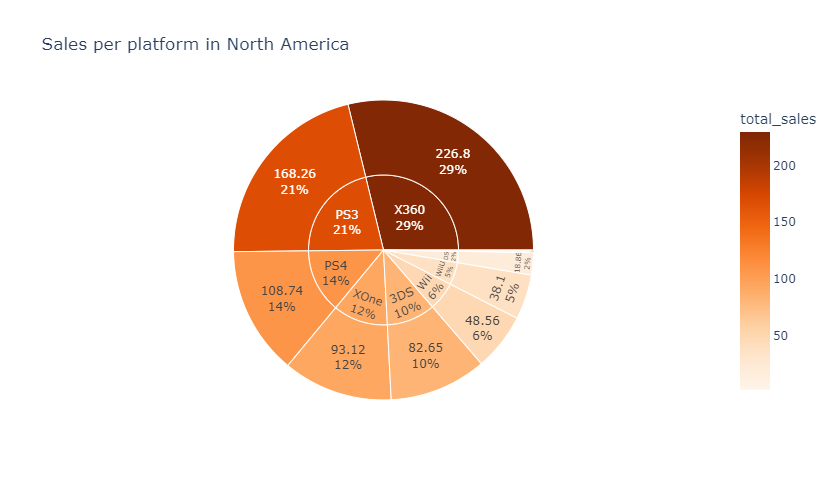

  platform  total_sales  avg_sales_per_game
7     X360       226.80                0.46
2      PS3       168.26                0.24
3      PS4       108.74                0.28
8     XOne        93.12                0.38
0      3DS        82.65                0.16
5      Wii        48.56                0.25
6     WiiU        38.10                0.26
1       DS        18.86                0.10
4      PSP         2.19                0.01
-----------------------------------------------------------------------------------------------


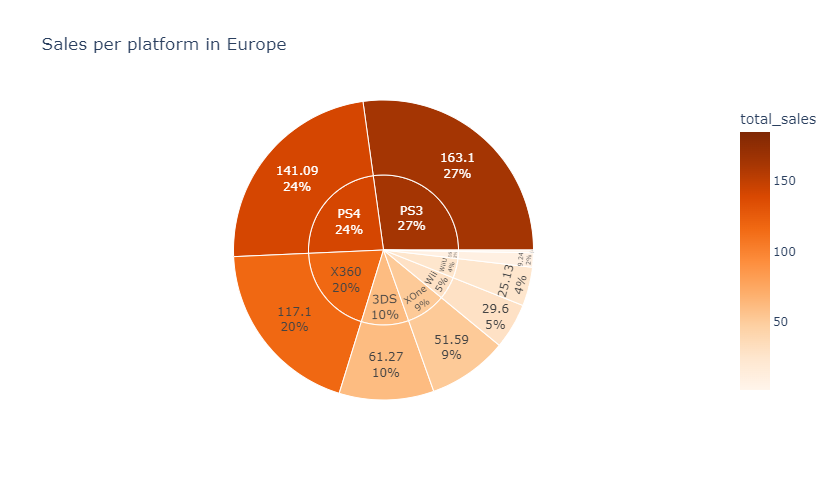

  platform  total_sales  avg_sales_per_game
2      PS3       163.10                0.23
3      PS4       141.09                0.36
7     X360       117.10                0.24
0      3DS        61.27                0.12
8     XOne        51.59                0.21
5      Wii        29.60                0.15
6     WiiU        25.13                0.17
1       DS         9.24                0.05
4      PSP         1.77                0.01
-----------------------------------------------------------------------------------------------


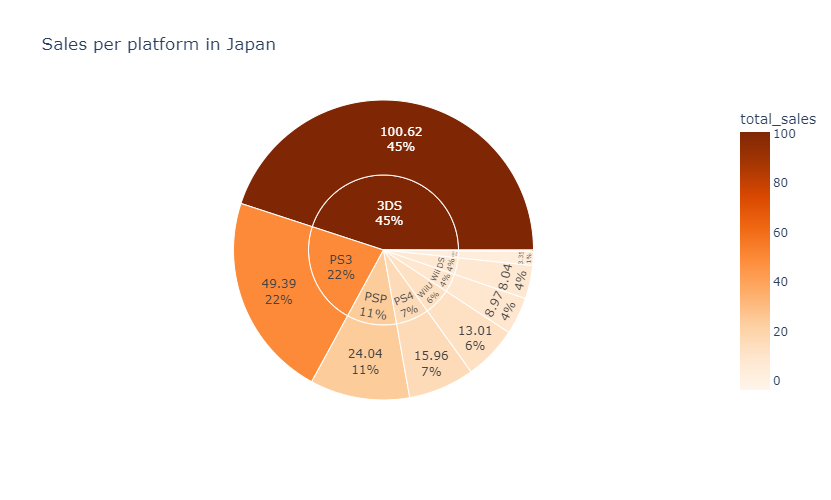

  platform  total_sales  avg_sales_per_game
0      3DS       100.62                0.20
2      PS3        49.39                0.07
4      PSP        24.04                0.08
3      PS4        15.96                0.04
6     WiiU        13.01                0.09
5      Wii         8.97                0.05
1       DS         8.04                0.04
7     X360         3.35                0.01
8     XOne         0.34                0.00
-----------------------------------------------------------------------------------------------


In [103]:
pie_chart('platform')

<a class="anchor" id="section_3_8_2"></a>

<a class="anchor" id="previous30"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous29)

[Go to next section](#previous31)

#### Conclusion

- We see users in **North America** spending more money on games on: 
1. `X360` (226.8 million, market share 29%, games released between 2005-2016, had it's peaks in 2011-2012 when we started to account data for user profile, last years sales - 35 and 13 million worldwide)
2. `PS3` (168.26 million, market share 21%, games released between 2006-2016, had it's peak in 2011, last years sales - 73 and 38 million worldwide)
3. `PS4` (108.74 million, market share 14%, games released between 2013-2016, continues to grow)
4. `XOne` (93.12 millions, market share 12%, games released between 2013-2016, continues to grow)
5. `3DS` (82.65 millions, market share 10%, games released between 2011-2016, had it's peak in the year of first release, last years sales - 86 and 46 million worldwide)

We see that the most successful generation of PS and Xbox from 2011 are still the previous - `PS3` and `X360`. The `X360` was a winner between the previous generations. The latest ones `XOne` and `PS4` have similar numbers.

- In **Europe** users spent more money on games on: 
1. `PS3` (163.10 million, market share 27%)
2. `PS4` (141.09 million, market share 24%)
3. `X360` (117.10 million, market share 20%)
4. `3DS` (61.27 million, market share 10%)
5. `XOne` (51.59 million, market share 9%)

We see that none of the latest platforms outperforms the old versions in both Europe and NA. But here PS was more popular than Xbox with over 50% market share (`PS3`+`PS4`) versus 29% for `X360`+`XOne`.

- Here is what **Japan**'s top5 looks like: 
1. `3DS` (100.62 million, market share 45%)
2. `PS3` (49.39 million, market share 22%)
3. `PSP` (24.04 million, market share 11%, games released between 2004-2015, had it's peak in 2010 in terms of worldwide sales)
4. `PS4` (15.96 million, market share 7%)
5. `WiiU` (13.01 million, market share 6%, games released between 2012-2016)

Japanese gamers prefer Japanese companies (Nintendo - `3DS` with 45% market share and `WiiU` - 6%), and also portable devices over consoles - they are `3DS` and `PSP`. Xbox consoles did not succeed in Japan.

<a class="anchor" id="section_3_8_3"></a>

<a class="anchor" id="previous31"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous30)

[Go to next section](#previous32)

### Top five genres

Make the same steps for Top 5 genres.

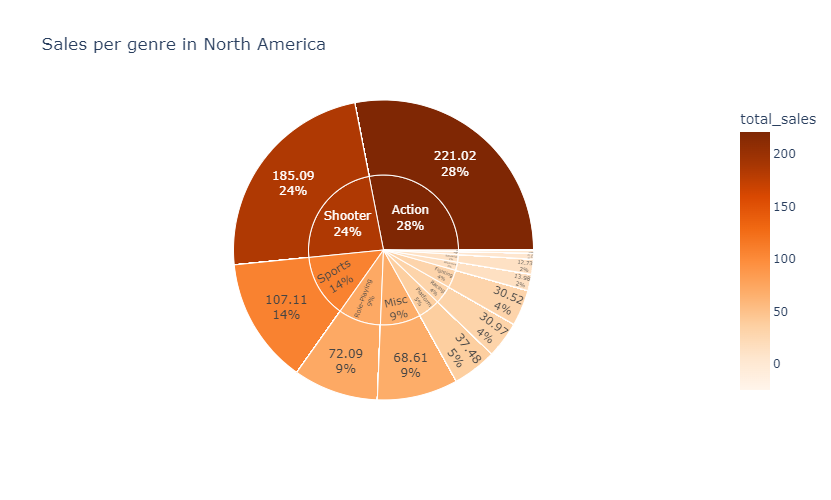

           genre  total_sales  avg_sales_per_game
0         Action       221.02                0.21
8        Shooter       185.09                0.71
10        Sports       107.11                0.32
7   Role-Playing        72.09                0.21
3           Misc        68.61                0.20
4       Platform        37.48                0.35
6         Racing        30.97                0.22
2       Fighting        30.52                0.22
1      Adventure        13.98                0.05
9     Simulation        12.73                0.14
11      Strategy         5.05                0.08
5         Puzzle         2.63                0.05
-----------------------------------------------------------------------------------------------


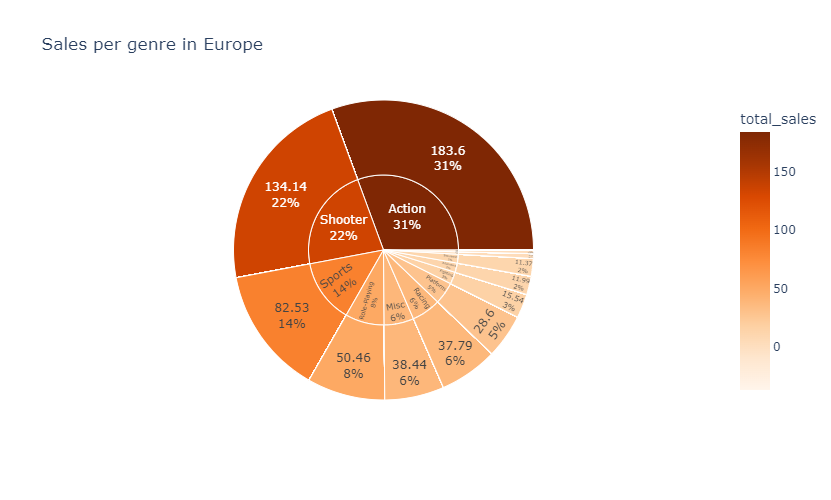

           genre  total_sales  avg_sales_per_game
0         Action       183.60                0.18
8        Shooter       134.14                0.51
10        Sports        82.53                0.24
7   Role-Playing        50.46                0.15
3           Misc        38.44                0.11
6         Racing        37.79                0.27
4       Platform        28.60                0.27
2       Fighting        15.54                0.11
1      Adventure        11.99                0.04
9     Simulation        11.37                0.13
5         Puzzle         3.11                0.06
11      Strategy         2.32                0.04
-----------------------------------------------------------------------------------------------


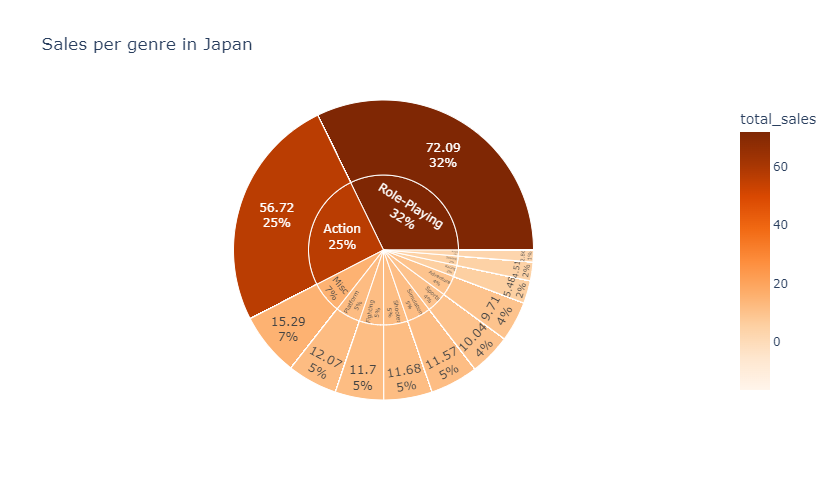

           genre  total_sales  avg_sales_per_game
7   Role-Playing        72.09                0.21
0         Action        56.72                0.06
3           Misc        15.29                0.04
4       Platform        12.07                0.11
2       Fighting        11.70                0.08
8        Shooter        11.68                0.04
9     Simulation        11.57                0.13
10        Sports        10.04                0.03
1      Adventure         9.71                0.03
6         Racing         5.48                0.04
11      Strategy         4.51                0.07
5         Puzzle         2.86                0.05
-----------------------------------------------------------------------------------------------


In [104]:
pie_chart('genre')

<a class="anchor" id="section_3_8_4"></a>

<a class="anchor" id="previous32"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous31)

[Go to next section](#previous33)

#### Conclusion

- We see that in **North America** users spent money on games of such genres as: 
1. `Action` (221.02 million, market share 28%)
2. `Shooter` (185.09 million, market share 24%)
3. `Sports` (107.11 million, market share 14%)
4. `Role-Playing` (72.09 million, market share 9%)
5. `Misc` (68.61 million, market share 9%)

Users in North America like `Action` genre the most in terms of sales, but revenue per game higher for `Shooter` and `Sports` (0.46 million per game and 0.36 million per game accordingly).

- In **Europe** users bought more games of such genres as:
1. `Action` (183.6 million, market share 31%)
2. `Shooter` (134.14 million, market share 22%)
3. `Sports` (82.53 million, market share 14%)
4. `Role-Playing` (50.46 million, market share 8%)
5. `Misc` (38.44 million, market share 6%)

Users in EU have the similar preferences. Revenue per game for `Shooter` here 0.51 million per game versus 0.18 million for `Action`. This means that there are many games of the `Action` genre on the market, not all of which are as profitable, while the number of `Shooter` games is lower, but they generate higher profits.

- This is the users preferences on the **Japanese** market:
1. `Role-Playing` (72.09 million, market share 32%) 
2. `Action` (56.72 million, market share 25%)
3. `Misc` (15.29 million, market share 7%)
4. `Platform` (12.07 million, market share 5%)
5. `Fighting` (11.70 million, market share 5%)

In Japan on the first role comes the `Role-Playing` genre - 32% of the market. `Action` on the second place. They do not like `Shooters` so much - it is not in the top 5. We know now who was a key player in bringing `Role-Playing` genre to the top 5 worldwide in terms of sales.

<a class="anchor" id="section_3_8_5"></a>

<a class="anchor" id="previous33"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous32)

[Go to next section](#previous34)

### ESRB ratings

Make the same steps to get for each region ESRB rating's sales. To avoid `ZeroDivisionError` for Japan, exclude ratings `18+` and `3+` from games_platforms.

In [105]:
def pie_chart(column):
    sales = {'na_sales': ('na', 'North America'),
            'eu_sales': ('eu', 'Europe'), 
            'jp_sales': ('jp', 'Japan')}
    
    
    for key in sales.keys():
        df = (
            games_platforms[(games_platforms['rating'] != '18+') & (games_platforms['rating'] != '3+')]
            .groupby([column])[key]
            .agg(['sum', 'mean'])
            .reset_index()
            .sort_values(by='sum',ascending=False)
            .round(2)
        )
        df.columns = [column, 'total_sales', 'avg_sales_per_game']
         
        fig = px.sunburst(df, path=[column, 'total_sales'], values='total_sales', 
                          title = 'Sales per {} in {}'.format(column, sales[key][1]),
                          color = 'total_sales', 
                          hover_data = ['avg_sales_per_game'],
                          color_continuous_scale='Oranges',
                          color_continuous_midpoint=np.average(df['total_sales'], 
                                                               weights=df['avg_sales_per_game'])
                         )
        
        
        fig.update_traces(textinfo='percent root+label')
        fig.update_layout(
            autosize=True,
            width=500,
            height=500,
            margin=dict(
                l=50,
                r=50,
                b=100,
                t=100,
                pad=4)
        )
        fig.show()
        
        print(df)
        print('-----------------------------------------------------------------------------------------------')

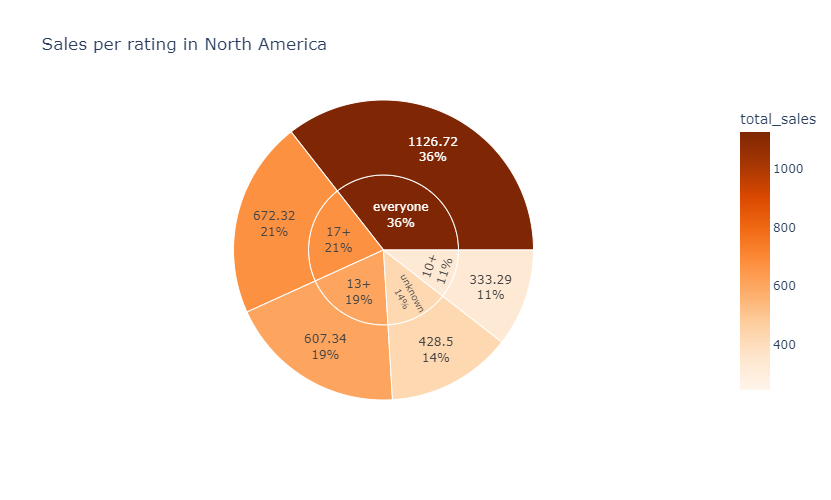

     rating  total_sales  avg_sales_per_game
3  everyone      1126.72                0.33
2       17+       672.32                0.52
1       13+       607.34                0.26
4   unknown       428.50                0.10
0       10+       333.29                0.26
-----------------------------------------------------------------------------------------------


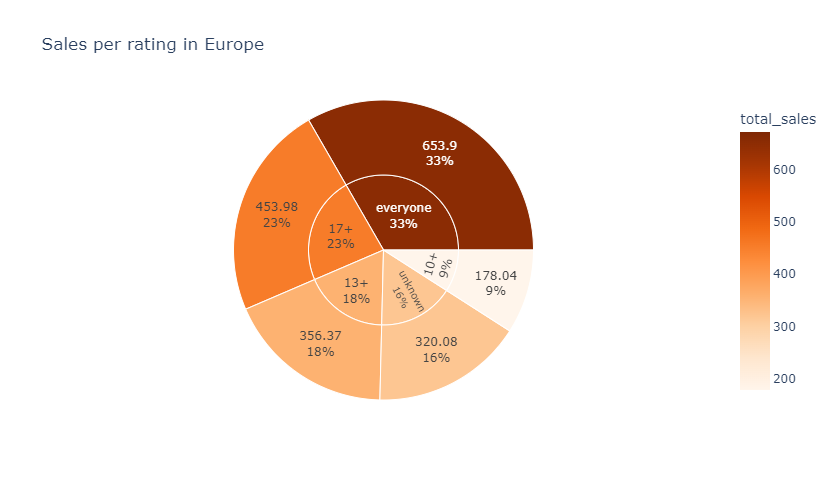

     rating  total_sales  avg_sales_per_game
3  everyone       653.90                0.19
2       17+       453.98                0.35
1       13+       356.37                0.15
4   unknown       320.08                0.08
0       10+       178.04                0.14
-----------------------------------------------------------------------------------------------


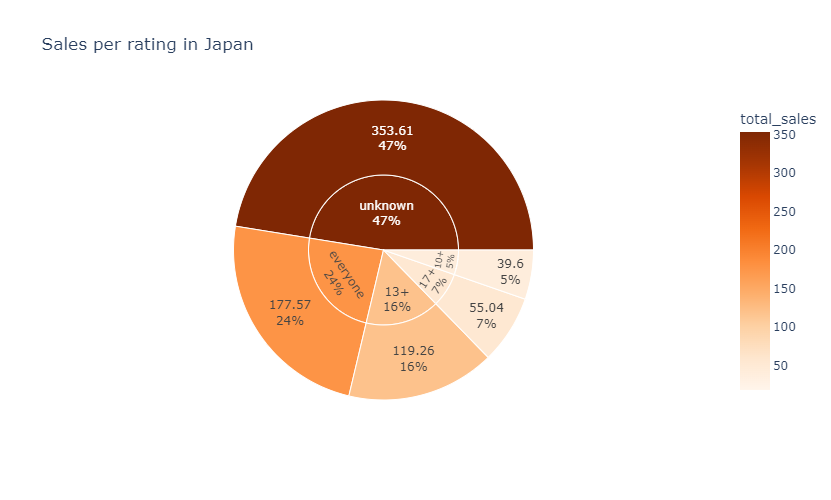

     rating  total_sales  avg_sales_per_game
4   unknown       353.61                0.08
3  everyone       177.57                0.05
1       13+       119.26                0.05
2       17+        55.04                0.04
0       10+        39.60                0.03
-----------------------------------------------------------------------------------------------


In [106]:
pie_chart('rating')

<a class="anchor" id="section_3_8_6"></a>

<a class="anchor" id="previous34"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous33)

[Go to next section](#previous35)

#### Conclusion 

In terms of sales, games with the `Everyone` rating made more money in North America and Europe, with 36% and 33% of the market share, respectively. On the other hand, if we examine the average sales per game released, we can see that games with a rating `17+` do better - 0.52 and 0.35 million per game respectively for North America and Europe. 

A popular reason for the popularity of age-appropriate games is that teenagers and adults can both enjoy them. Video games are primarily consumed by this group.

According to our analysis, in Japan there is 47% of the market share in terms of sales - on an `unknown` rating, so we cannot be certain if our analysis is accurate.

**User profile:**
- North America: 
    - The most popular console was the `X360`, but the new generation consoles, the `PS4` and `XOne`, are fairly comparable to each other. `X360` and `XOne` have average sales per game of 0.46 million and 0.38 million, respectively, compared to 0.28 million for `PS4`. Therefore, Xbox users are prevalent in North America.
    - Prefer the `Action` and `Shooter` genres, however, revenue per game is higher for `Shooter` and `Sports` (0.46 million per game and 0.36 million per game, respectively)
    - `17+` rated games deserve the love of gamers, while `Everyone` has a higher number of releases and a higher total sales figure.

- Europe:
    - In terms of sales, `PS3` and `PS4` hold a 51% share of the market. In terms of average sales per game, the `PS4` leads with 0.36 million per game, while the `X360` has 0.24 million per game.
    - Among European gamers, `Action` and `Shooter` are also the most popular genres, with `Shooter` achieving the highest average sales rate.
    - Like in NA `17+` rated games deserve the love of gamers, while `Everyone` has a higher number of releases and a higher total sales figure.

- Japan:  
    - A leading position is held by the Nintendo `3DS`, so portable devices dominate the market.
    - `Role-Playing` games outperform action games.
    - It is likely that many games with an `unknown` rating have a different rating system. Thus, Japanese-released games may be played more frequently by gamers than foreign-released games.

<a class="anchor" id="chapter4"></a>

<a class="anchor" id="previous35"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous34)

[Go to next section](#previous36)

## Test the hypotheses

<a class="anchor" id="section_4_1"></a>

### Average user ratings of the Xbox One and PC platforms are the same

We will examine the average user scores for the `XOne` and the `PC` platforms. Calculate the mean using the `query()` and `agg()` methods. In this analysis, we will only take data from 2011, since we deemed it relevant to the study.

In [107]:
XOne_user_score_mean = df_games.query('platform == "XOne" and year_of_release >=2011')['user_score'].agg('mean')
XOne_user_score_mean

6.52142857142857

In [108]:
PC_user_score_mean = df_games.query('platform == "PC" and year_of_release >=2011')['user_score'].agg('mean')
PC_user_score_mean

6.451791530944625

We see that they are different. But the difference is small. We want to prove statistically that user scores for `XOne` and `PC` platforms are the same. 
Is there a significant difference between these numbers? We cannot conclude that the difference between the means is random until we conduct the correct test. Likewise, we cannot conclude that the difference is large enough to suggest that mean user scores between the two populations (for XOne and PC) differ (i.e. that the difference is significant). This depends on the variance of the samples from which the values are calculated. Consider performing a statistical test on the datasets rather than relying solely on the averages for comparison.

Set two datasets from `df_games`. One for `XOne`, second for `PC`. Use the `query()` method. We should also remove null values. It is necessary to use `dropna()` method.

In [109]:
sample1 = df_games.query('platform == "XOne" and year_of_release >=2011')['user_score'].dropna()
sample1.head()

165    7.9
179    5.4
242    6.4
270    6.2
373    4.1
Name: user_score, dtype: float64

In [110]:
sample2 = df_games.query('platform == "PC" and year_of_release >=2011')['user_score'].dropna()
sample2.head()

192    4.0
313    8.1
458    3.9
480    5.9
538    7.5
Name: user_score, dtype: float64

Our next step will be to check the sample sizes.

In [111]:
print('Percentage:', len(sample1) / len(df_games.query('year_of_release >=2011')['user_score'].dropna()))
print('Sample size:', len(sample1))

Percentage: 0.08956692913385826
Sample size: 182


In [112]:
print('Percentage:', len(sample2) / len(df_games.query('year_of_release >=2011')['user_score'].dropna()))
print('Sample size::', len(sample2))

Percentage: 0.15108267716535434
Sample size:: 307


**Formulate the null hypothesis**: let's say that the average user scores for games on `XOne` and `PC` are the same, i.e. there's no difference between two populations.

**Formulate the alternative hypothesis:** there is significant difference between the average user scores for games on `XOne` and `PC`.

In order to test the null hypothesis that the means of the two statistical populations are equal based on samples taken from them, apply the method **scipy.stats.ttest_ind(array1, array2, equal_var)**.
We pass these parameters to the method:  
* `array1`, `array2` are arrays containing the samples  
* `equal_var` (equal variance) is a parameter that specifies whether or not the variances of the populations should be considered equal. It's passed as `equal_var = True` or `equal_var = False` (True means we consider the variances equal, False means we don't).

To determine whether the variances of two samples are equal, we can conduct a Levene test.

Apply the `scipy.stats.levene(array1, array2)`. Assign it to `p_value_levene` variable and compare it with alpha. Set **alpha =0.05 (critical statistical significance level - if the p-value is less than alpha, we reject the hypothesis).** If it's less than alpha we reject the null hypothesis that variances of samples are equal.

In [113]:
alpha = 0.05

In [114]:
p_value_levene = st.levene(sample1, sample2).pvalue
if p_value_levene < alpha:
    print('Reject the null hypothesis: variances of samples is not equal')
else:
    print("Fail to Reject the null hypothesis: We don't have enough evidence to say that" +
          " variances of samples are not the same")

Reject the null hypothesis: variances of samples is not equal


Let's test the hypothesis that the means of the two independent populations are equal. Use the method **ttest_ind** from the `scipy.stats` package to test the hypothesis.   

Write function to carry out our test. Make levene test inside the function. It will set `equal_var = option_var`, that equels False if `p_value_levene < alpha`, else it will set `option_var=True`. Compare the p_value with the significance level (alpha). If it's less than alpha we reject the null hypothesis.

In [115]:
def t_test(sample1,sample2, alpha):
    p_value_levene = st.levene(sample1, sample2).pvalue
    if p_value_levene < alpha:
        option_var = False
    else:
        option_var = True
    print('p_value_levene is', p_value_levene, 'so option_var is', option_var)    
    
    p_value = st.ttest_ind(sample1, sample2, equal_var = option_var).pvalue
    print('p_value is', p_value)
    
    if p_value < alpha:
        print('Reject the null hypothesis: averages of samples is not equal')
    else:
        print( "Fail to Reject the null hypothesis: We don't have enough evidence" +
              " to say that averages of samples are not the same")

Conduct the test.

In [116]:
t_test(sample1, sample2, 0.05)

p_value_levene is 0.019238606822499546 so option_var is False
p_value is 0.6130712247638477
Fail to Reject the null hypothesis: We don't have enough evidence to say that averages of samples are not the same


<a class="anchor" id="section_4_1_1"></a>

<a class="anchor" id="previous36"></a>

[Back to table of contents](#back1)

#### Conclusion

We failed to reject the null hypothesis that the average user scores for `XOne` and `PC` are the same. This p-value indicates that there is might be big chance of obtaining a difference that size or larger at random (i.e. it is seems that user scores are equal). Accordingly, we can conclude that there is not a significant difference between the average user scores for `XOne` and `PC`.

<a class="anchor" id="section_4_2"></a>

<a class="anchor" id="previous36"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous35)

[Go to next section](#previous37)

### Average user ratings for the Action and Sports genres are different

Test the second hypothesis. Check out the average user scores for `Action` and `Sports` genres. Calculate the mean using `query()` and `agg()`.  

In [117]:
action_user_score_mean = df_games.query('genre == "Action" and year_of_release >=2011')['user_score'].agg('mean')
action_user_score_mean

6.775903614457846

In [118]:
sports_user_score_mean = df_games.query('genre == "Sports" and year_of_release >=2011')['user_score'].agg('mean')
sports_user_score_mean

5.650813008130081

As we can see, they are different. We want to prove statistically that there is no difference between user scores for `Action` and `Sports`.

Set two datasets from `df_games`. One for `Action`, second for `Sports`. Use the `query()` method. We should also remove null values. It is necessary to use `dropna()` method.

In [119]:
sample3 = df_games.query('genre == "Action" and year_of_release >=2011')['user_score'].dropna()
sample3.head()

16     8.2
23     8.1
42     8.3
81     6.6
118    8.3
Name: user_score, dtype: float64

In [120]:
sample4 = df_games.query('genre == "Sports" and year_of_release >=2011')['user_score'].dropna()
sample4.head()

77     4.3
94     5.0
126    4.3
143    5.7
264    4.5
Name: user_score, dtype: float64

Our next step will be to check the sample sizes.

In [121]:
print('Percentage:', len(sample3) / len(df_games.query('year_of_release >=2011')['user_score'].dropna()))
print('Sample size:', len(sample3))

Percentage: 0.32677165354330706
Sample size: 664


In [122]:
print('Percentage:', len(sample4) / len(df_games.query('year_of_release >=2011')['user_score'].dropna()))
print('Sample size::', len(sample4))

Percentage: 0.12106299212598425
Sample size:: 246


**Formulate the null hypothesis**: let's say that the average user scores for `Action` and `Sports` genres are the same, i.e. there's no difference between two populations.

**Formulate the alternative hypothesis:** there is significant difference between the average user scores for `Action` and `Sports` genres.

Run the test using our function t_test.

In [123]:
t_test(sample3, sample4, alpha=0.05)

p_value_levene is 1.9840382117903915e-05 so option_var is False
p_value is 8.285648549432565e-19
Reject the null hypothesis: averages of samples is not equal


<a class="anchor" id="section_4_2_1"></a>

[Back to table of contents](#back1)

#### Conclusion

The null hypothesis that the average user scores for `Action` and `Sports` are the same is rejected. This p-value indicates that there is very little chance of obtaining a difference that size or larger at random (i.e. it is very unlikely that user scores are equal). Accordingly, we can conclude that there is a significant difference between the average user scores for `Action` and `Sports` genres.

<a class="anchor" id="chapter5"></a>

<a class="anchor" id="previous37"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous36)

[Go to next section](#previous38)

<a class="anchor" id="previous37"></a>

## General conclusion

- In this project such libraries were used: NumPy, pandas, seaborn, matplotlib.pyplot, plotly.express, scipy.stats, math.factorial, sidetable.

- After preprocessing the data, dealing with missing values, after we calculated the total sales for each game, we analyzed the data from a broad perspective to a more detailed one.

- We analyzed the data from 1994 how many games were released in different years.

    There has been a significant increase in the number of new games released each year since 1994 (from 60 in previous years to 121 in 1994), accelerated after 2002 (829 new games), and peaked in 2008-2009 (1427 - 1426 new games released each year). In the past year, the number of new games has decreased to 502. There may be a reason for this, as many people continue to play their favorite game series from previous years, and companies only remaster these games or release new versions of them. Previously, there were many games studios, but now there are probably only a few large studios left.

- Analyzed how sales differed by platform and built distributions based on the chosen platforms. Based on our research, we discovered that the lifecycle of each platform is generally five to six years.

- The sales of all platforms are shrinking, though we may not have complete data for the past year. However, we have observed an increase in the number of games released each year.

- Based on these findings, we can consider the next year's prognosis based only on games released on PS4, Xbox One, and Nintendo 3DS.

- As a result, we determined that we should analyze the most recent period - the 2011 year, when the most recent platforms were first introduced.

- In addition, we examined how user and professional reviews affect sales. A user review of a game does not depend on a platform and does not affect total sales, since games have already been sold before the user review is received.


- However, the critic score has a greater influence on the total sales. In this regard, we should consider reviews by critics when choosing games for advertising, since there is a greater likelihood that the game will be more successful. 

- **We analyzed the distribution of games by genre in terms of number of games, sales and average sales per game.** We concluded that the most profitable genre is `Shooter`, with 0.88 million dollars in revenue per game, despite the fact that the `Action` genre has more games released and a higher sales total.

- **We have created a user profile for each region** and have concluded that in Europe the most popular games are on the `PS4`, while in North America they are on the `XOne` in genres such as `Shooter` and `Action`, rated for `Everyone` or `17+`.
- As for the Japanese market, it is more closed and oriented toward local games and local platforms (Nintendo), especially with regard to portable devices. A preferred genre would be `Role-playing`. 
- Therefore, we should consider that when planning our advertising campaign.

Additionally, we wanted to test the following hypotheses:

**- That the average user ratings of the `XOne` and `PC` platforms are the same.**

**- That the average user ratings for the `Action` and `Sports` genres are different.**
- Based on the results, we were able to determine that platforms do not affect user ratings, but genre might be a contributing factor.

<a class="anchor" id="chapter6"></a>

<a class="anchor" id="previous38"></a>

[Back to table of contents](#back1)

[Back to previous section](#previous37)

### Recommendations for add campains

As a final recommendation, we advice focusing advertising campaigns on games for the `PS4` in Europe and the `XOne` in North America. It is recommended that these games be of the genres of `Action` and `Shooter` and have an ESRB rating of `Everyone` or `17+`. In Japan, the best choice would be to use a game for portable device - the Nintendo `3DS` - and games for it of Japanese production in the `role-playing` genre. Worth paying attention on games with good critics review.